# Knowledge-exploration
## Participants based analysis

In [297]:
import pandas as pd
import numpy as np
from ast import literal_eval
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from umap import UMAP

## Call the embeddings

In [2]:
# question 1 embedding from distilbert model
emb_1 = pd.read_json('~/thesis/embeddings/knowledge_distilbert_answer1.jsonl', orient='index')
emb_1 = emb_1[['participant_id', 'embedding1']].rename(columns = {'participant_id': 'index', 'embedding1': 'q1'})

In [3]:
# question 2 embedding from distilbert model
emb_2 = pd.read_json('~/thesis/embeddings/knowledge_distilbert_answer2.jsonl', orient='index')
emb_2 = emb_2[['participant_id', 'embedding2']].rename(columns = {'participant_id': 'index', 'embedding2': 'q2'})

In [4]:
# question 3 embedding from distilbert model
emb_3 = pd.read_json('~/thesis/embeddings/knowledge_distilbert_answer3.jsonl', orient='index')
emb_3 = emb_3[['participant_id', 'embedding3']].rename(columns = {'participant_id': 'index', 'embedding3': 'q3'})

In [5]:
# question 4 embedding from distilbert model
emb_4 = pd.read_json('~/thesis/embeddings/knowledge_distilbert_answer4.jsonl', orient='index')
emb_4 = emb_4[['participant_id', 'embedding4']].rename(columns = {'participant_id': 'index', 'embedding4': 'q4'})

In [6]:
# question 5 embedding from distilbert model
emb_5 = pd.read_json('~/thesis/embeddings/knowledge_distilbert_answer5.jsonl', orient='index')
emb_5 = emb_5[['participant_id', 'embedding5']].rename(columns = {'participant_id': 'index', 'embedding5': 'q5'})

## Aggregate within the dataframe first and then join together

In [7]:
emb_1.head(5)

,index,q1
0,00278,"[-0.1912737638, -0.1773329824, -0.2605425715, ..."
1,00278,"[-0.0679296777, -0.13514108960000001, -0.13267..."
2,00278,"[-0.1031195149, -0.2114465237, -0.3880674839, ..."
3,00278,"[-0.2258333266, -0.0020551765, -0.049876611700..."
4,00278,"[-0.12228399520000001, 0.0300362222, -0.148336..."


In [8]:
# Group by 'index' and calculate the sum of 'q1_emb'
emb_1 = emb_1.groupby('index')['q1'].apply(lambda x: np.sum(np.stack(x), axis=0))
emb_1 = pd.DataFrame(emb_1, columns= ['q1'])
emb_1['index'] = emb_1.index
emb_1 = emb_1.reset_index(drop = True)

In [9]:
emb_1

,q1,index
0,"[-0.7104402782, -0.4959395499999999, -0.979493...",00278
1,"[-0.3586821751, -0.15381824970000002, -0.82275...",0068d
2,"[-0.8142896731, -0.8274497016000002, -0.467351...",00f13
3,"[-1.1899076254, -0.35361887050000007, -0.62465...",01cb6
4,"[-0.5799569711, -0.7829514518999999, -0.642515...",02670
...,...,...
293,"[-0.8872908205, -0.5147986337, -0.3124759718, ...",f92a4
294,"[-1.0343732499, 0.08551241459999999, -0.777054...",f9fd8
295,"[-0.9605374336, -0.5323074348, -0.226703439899...",fb2a2
296,"[-0.7214982268000001, -0.3550048601, -0.726685...",fb9c4


In [10]:
# Group by 'index' and calculate the sum of 'q2_emb'
emb_2 = emb_2.groupby('index')['q2'].apply(lambda x: np.sum(np.stack(x), axis=0))
emb_2 = pd.DataFrame(emb_2, columns= ['q2'])
emb_2['index'] = emb_2.index
emb_2 = emb_2.reset_index(drop = True)

In [11]:
# Group by 'index' and calculate the sum of 'q3_emb'
emb_3 = emb_3.groupby('index')['q3'].apply(lambda x: np.sum(np.stack(x), axis=0))
emb_3 = pd.DataFrame(emb_3, columns= ['q3'])
emb_3['index'] = emb_3.index
emb_3 = emb_3.reset_index(drop = True)

In [12]:
# Group by 'index' and calculate the sum of 'q4_emb'
emb_4 = emb_4.groupby('index')['q4'].apply(lambda x: np.sum(np.stack(x), axis=0))
emb_4 = pd.DataFrame(emb_4, columns= ['q4'])
emb_4['index'] = emb_4.index
emb_4 = emb_4.reset_index(drop = True)

In [13]:
# Group by 'index' and calculate the sum of 'q5_emb'
emb_5 = emb_5.groupby('index')['q5'].apply(lambda x: np.sum(np.stack(x), axis=0))
emb_5 = pd.DataFrame(emb_5, columns= ['q5'])
emb_5['index'] = emb_5.index
emb_5 = emb_5.reset_index(drop = True)

In [14]:
# # check manually if the above code works.

# temp = df_1_whole[['PARTICIPANT_ID', 'emb_ideas']]
# print(temp[temp['PARTICIPANT_ID']== '00278']['emb_ideas'].to_list())
# instance = temp[temp['PARTICIPANT_ID']== '00278']['emb_ideas']

# sum = 0 
# for i in range(5): 
#     sum += instance[0][i][0]
# sum/5 # This should match with the first element of the emb_1['q1'][0]

## Demographic data calling

In [29]:
# call the original data again
df = pd.read_csv('~/knowledge-explore/data/processed_data/reference_dataset_v1.csv')

In [30]:
df.head(3)

,Unnamed: 0,problem_id,participant_id,DAT,CRT2,CURIOSITY_SCORE,AGE,GENDER,EDUCATION,EMPLOYMENT,...,POLITICAL,CLIMATE,COVID,NEWS,MEDIA,RELATION_KNOWLEDGE,RELATION_INTEREST,RELATION_CONCERN,ideas,emb_ideas
0,0,Q1,00278,74.104969,3,4.229167,24,1,5,1,...,2,1,1,4,5,2,4,4,"['vaccination schemes in these areas', 'increa...","[[-0.011656875722110271, -0.019422005861997604..."
1,1,Q2,00278,74.104969,3,4.229167,24,1,5,1,...,2,1,1,4,5,3,5,5,['equal pay for women and men in the same role...,"[[-0.0034376916009932756, 0.006209875456988811..."
2,2,Q3,00278,74.104969,3,4.229167,24,1,5,1,...,2,1,1,4,5,3,5,5,"['look into conservation plans ', 'ensure poac...","[[0.03516001999378204, -0.004544570576399565, ..."


In [31]:
df = df.rename(columns = {'participant_id': 'PARTICIPANT_ID'})
df = df.set_index('PARTICIPANT_ID')

In [32]:
demos = df[['AGE', 'GENDER', 'EDUCATION', 'EMPLOYMENT', 'INCOME', 'POLITICAL', 'DAT', 'CRT2']]

In [33]:
# Check for duplicate indices
duplicates = demos.index.duplicated()

# keep only the first occurrence of each participant_id (remove duplicates)
demos.drop_duplicates(keep='first', inplace=True)

# Display the modified DataFrame
print("\nDataFrame with unique participant_id:")
print(demos)


DataFrame with unique participant_id:
                AGE  GENDER  EDUCATION  EMPLOYMENT  INCOME  POLITICAL  \
PARTICIPANT_ID                                                          
00278            24       1          5           1       3          2   
0068d            74       1          2           7       2          4   
00f13            43       1          4           1       3          3   
01cb6            56       3          2           8       1          1   
02670            25       1          5           1       2          2   
...             ...     ...        ...         ...     ...        ...   
f92a4            35       1          5           1       3          3   
f9fd8            50       1          4           8       2          2   
fb2a2            38       1          2           8       1          3   
fb9c4            21       1          4           8       3          2   
ff2bf            67       1          2           7       2          4   

           

/tmp/ipykernel_2278074/256376826.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demos.drop_duplicates(keep='first', inplace=True)


## Analysis within question

### Question 1 
"How could we increase vaccination rates in rural areas?"

In [15]:
emb_1['q1'][0].shape

(768,)

In [16]:
matrix = np.vstack(emb_1['q1'].values)
matrix.shape

(298, 768)

In [17]:
X = matrix.copy()

## Dimensionality reduction (umap)

In [18]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

In [19]:
from umap import UMAP

In [20]:
# Step 1: Normalize the data
from sklearn.preprocessing import StandardScaler
normalized_embeddings = StandardScaler().fit_transform(X)

In [21]:
# Step 2: Apply UMAP for dimensionality reduction
umap_model = UMAP(n_neighbors=10, min_dist=0.1, n_components=2, random_state = 42)
umap_embeddings = umap_model.fit_transform(normalized_embeddings)
X = umap_embeddings.copy()

/mnt/home/kim/venvs/my_environment/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [22]:
# Step 3: Use silhouette score to find optimal number of clusters
silhouette_scores = []
for num_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, cluster_labels))

optimal_num_clusters = silhouette_scores.index(max(silhouette_scores)) + 2

The last line derives from the fact that silhouette score is calculated from the num_cluster 2, so therefore if retrieving index of the lists, the first element's index is 0 but it indicates the value of num_cluster 2, therefore +2 would make it easier to retrieve the value. 


In [23]:
optimal_num_clusters

2

In [24]:
# Use Elbow-analysis as well to find optimal number of clusters
# Elbow analysis
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 20)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(np.sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = np.sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

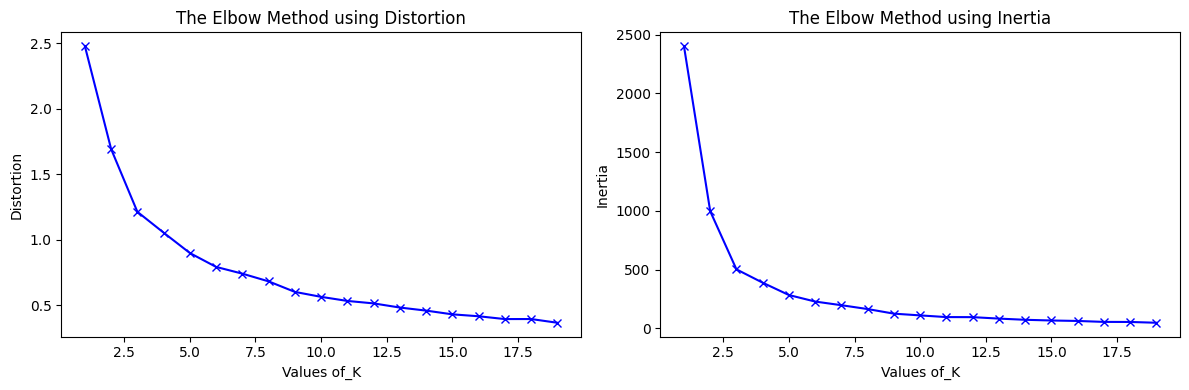

In [25]:
# Create a figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))  # Adjust figsize as needed

# Plot the first plot on ax1
ax1.plot(K, distortions, 'bx-')
ax1.set_xlabel('Values of_K')
ax1.set_ylabel('Distortion')
ax1.set_title('The Elbow Method using Distortion')


# Plot the second plot on ax2
ax2.plot(K, inertias, 'bx-')
ax2.set_xlabel('Values of_K')
ax2.set_ylabel('Inertia')
ax2.set_title('The Elbow Method using Inertia')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

Define the number of clusters for the clustering method combining the result of the graphs and the value of variable optimal_num_clusters

## KMeans clustering

In [26]:
# Step 4: Perform final clustering
final_kmeans = KMeans(n_clusters=2, random_state=0) # random_state fixed to 0, n_cluster changed
final_cluster_labels = final_kmeans.fit_predict(X)

# Save the result of clustering with random state 0 as a dataframe column
emb_1['label'] = final_cluster_labels  

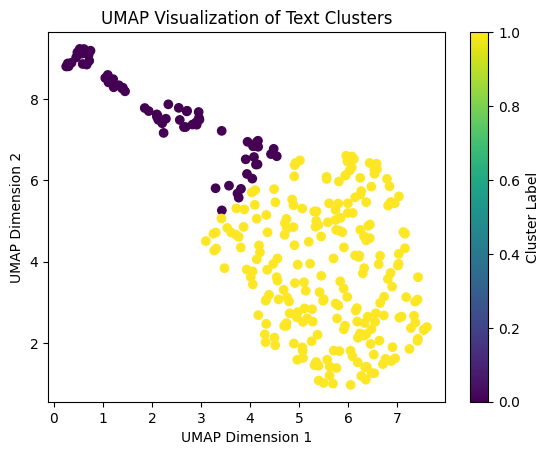

In [27]:
# Visualize clustering depending on different random states.
figures = [] # list to hold different figures. 

fig1, ax1 = plt.subplots()
scatter = ax1.scatter(X[:, 0], X[:, 1], c=final_cluster_labels, cmap='viridis')
ax1.set_xlabel('UMAP Dimension 1')
ax1.set_ylabel('UMAP Dimension 2')
ax1.set_title('UMAP Visualization of Text Clusters')

colorbar = plt.colorbar(scatter, ax=ax1)
colorbar.set_label('Cluster Label')

figures.append(fig1)

In [28]:
# Cluster labels obtained from clustering algorithm

final_cluster_labels # cluster_labels_from_bert
X # contextualized tokens of the input texts.

# Specify the question that is addressed. 
print("\n\"Question 1\"\n")

# Calculate Silhouette Coefficient
silhouette = silhouette_score(X, final_cluster_labels)
print(f"Silhouette Coefficient: {silhouette}")

# Calculate Calinski-Harabasz Index
calinski = calinski_harabasz_score(X, final_cluster_labels)
print(f"Calinski-Harabasz Index: {calinski}")

# Calculate Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(X, final_cluster_labels)
print(f"Davies-Bouldin Index: {davies_bouldin}")


"Question 1"

Silhouette Coefficient: 0.527221143245697
Calinski-Harabasz Index: 415.68350590988393
Davies-Bouldin Index: 0.6376734457436888


In [38]:
emb_1

,q1,index,label
0,"[-0.7104402782, -0.4959395499999999, -0.979493...",00278,1
1,"[-0.3586821751, -0.15381824970000002, -0.82275...",0068d,1
2,"[-0.8142896731, -0.8274497016000002, -0.467351...",00f13,1
3,"[-1.1899076254, -0.35361887050000007, -0.62465...",01cb6,1
4,"[-0.5799569711, -0.7829514518999999, -0.642515...",02670,1
...,...,...,...
293,"[-0.8872908205, -0.5147986337, -0.3124759718, ...",f92a4,0
294,"[-1.0343732499, 0.08551241459999999, -0.777054...",f9fd8,1
295,"[-0.9605374336, -0.5323074348, -0.226703439899...",fb2a2,1
296,"[-0.7214982268000001, -0.3550048601, -0.726685...",fb9c4,1


In [40]:
demos['index'] = demos.index

/tmp/ipykernel_2278074/2801886630.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demos['index'] = demos.index


In [41]:
demos

,AGE,GENDER,EDUCATION,EMPLOYMENT,INCOME,POLITICAL,DAT,CRT2,index
PARTICIPANT_ID,,,,,,,,,
00278,24,1,5,1,3,2,74.104969,3,00278
0068d,74,1,2,7,2,4,79.882640,2,0068d
00f13,43,1,4,1,3,3,77.948290,3,00f13
01cb6,56,3,2,8,1,1,78.969095,2,01cb6
02670,25,1,5,1,2,2,83.311323,1,02670
...,...,...,...,...,...,...,...,...,...
f92a4,35,1,5,1,3,3,65.242337,2,f92a4
f9fd8,50,1,4,8,2,2,80.076401,1,f9fd8
fb2a2,38,1,2,8,1,3,78.420482,0,fb2a2


In [46]:
result_1 = pd.merge(emb_1, demos, on = 'index')

In [47]:
result_1

,q1,index,label,AGE,GENDER,EDUCATION,EMPLOYMENT,INCOME,POLITICAL,DAT,CRT2
0,"[-0.7104402782, -0.4959395499999999, -0.979493...",00278,1,24,1,5,1,3,2,74.104969,3
1,"[-0.3586821751, -0.15381824970000002, -0.82275...",0068d,1,74,1,2,7,2,4,79.882640,2
2,"[-0.8142896731, -0.8274497016000002, -0.467351...",00f13,1,43,1,4,1,3,3,77.948290,3
3,"[-1.1899076254, -0.35361887050000007, -0.62465...",01cb6,1,56,3,2,8,1,1,78.969095,2
4,"[-0.5799569711, -0.7829514518999999, -0.642515...",02670,1,25,1,5,1,2,2,83.311323,1
...,...,...,...,...,...,...,...,...,...,...,...
293,"[-0.8872908205, -0.5147986337, -0.3124759718, ...",f92a4,0,35,1,5,1,3,3,65.242337,2
294,"[-1.0343732499, 0.08551241459999999, -0.777054...",f9fd8,1,50,1,4,8,2,2,80.076401,1
295,"[-0.9605374336, -0.5323074348, -0.226703439899...",fb2a2,1,38,1,2,8,1,3,78.420482,0
296,"[-0.7214982268000001, -0.3550048601, -0.726685...",fb9c4,1,21,1,4,8,3,2,83.133171,1


## The number of data points in each cluster

In [303]:
# community 0
com_0 = result_1[result_1['label'] == 0]
len(com_0)

71

In [304]:
# community 1
com_1 = result_1[result_1['label'] == 1]
len(com_1)

227

## Feature exploration

In [305]:
age = result_1['AGE']

In [306]:
# delete the null valued rows in the column 'age'
age = age.dropna()

In [307]:
# mean, var, std
print("mean of age:", np.mean(age))
print("variance of age:", np.var(age))
print("standard deviation of age:", np.std(age))

mean of age: 45.83557046979866
variance of age: 242.12396964100714
standard deviation of age: 15.560333211117529


In [308]:
# Dataframe age with each communities
age_0 = com_0['AGE']
age_1 = com_1['AGE']
# print cardinality, mean, var, std within the cluster.
# community_0
print("*community_0 in age")
print("how many:", len(age_0))
print("mean:", np.mean(age_0))
print("variance:", np.var(age_0))
print("std:", np.std(age_0))

# community_1
print("\n*community_1 in age ")
print("how many:", len(age_1))
print("mean:", np.mean(age_1))
print("variance:", np.var(age_1))
print("std:", np.std(age_1))

*community_0 in age
how many: 71
mean: 46.29577464788732
variance: 224.74350327316006
std: 14.99144767102764

*community_1 in age 
how many: 227
mean: 45.691629955947135
variance: 247.47318985425682
std: 15.731280617109874


## Hypothesis testing

In [273]:
data = result_1

## ANOVA

## Age

In [274]:
from scipy.stats import levene, f_oneway
import statsmodels.api as sm
from statsmodels.stats.anova import AnovaRM
from statsmodels.stats.oneway import anova_oneway

In [275]:
# split the dataset for the analysis

grouped_data = [data['AGE'][data['label'] == cluster] for cluster in data['label'].unique()]

### Levene's Test

In [276]:
# Perform Levene's test
levene_stat, levene_p = levene(*grouped_data)

print(f"Levene's Test Statistic: {levene_stat}")
print(f"P-Value: {levene_p}")

# Check the result of Levene's test
if levene_p > 0.05:
    print("Variances are equal across groups (p > 0.05), you can proceed with ANOVA.\n")
    
    # Perform ANOVA
    anova_stat, anova_p = f_oneway(*grouped_data)
    
    print(f"ANOVA Test Statistic: {anova_stat}")
    print(f"P-Value: {anova_p}")
    
    if anova_p < 0.05:
        print("There is a significant difference in age across clusters (p < 0.05).")
    else:
        print("There is no significant difference in age across clusters (p > 0.05).")
else:
    print("Variances are not equal across groups (p <= 0.05), consider using a different test like Welch's ANOVA.")

Levene's Test Statistic: 0.7685409277400069
P-Value: 0.38137972167657297
Variances are equal across groups (p > 0.05), you can proceed with ANOVA.

ANOVA Test Statistic: 0.08100398136804193
P-Value: 0.7761404428190612
There is no significant difference in age across clusters (p > 0.05).


### DAT

In [277]:
# split the dataset for the analysis

grouped_data = [data['DAT'][data['label'] == cluster] for cluster in data['label'].unique()]

### Levene's Test

In [278]:
# Perform Levene's test
levene_stat, levene_p = levene(*grouped_data)

print(f"Levene's Test Statistic: {levene_stat}")
print(f"P-Value: {levene_p}")

# Check the result of Levene's test
if levene_p > 0.05:
    print("Variances are equal across groups (p > 0.05), you can proceed with ANOVA.\n")
    
    # Perform ANOVA
    anova_stat, anova_p = f_oneway(*grouped_data)
    
    print(f"ANOVA Test Statistic: {anova_stat}")
    print(f"P-Value: {anova_p}")
    
    if anova_p < 0.05:
        print("There is a significant difference in age across clusters (p < 0.05).")
    else:
        print("There is no significant difference in age across clusters (p > 0.05).")
else:
    print("Variances are not equal across groups (p <= 0.05), consider using a different test like Welch's ANOVA.")

Levene's Test Statistic: 3.102734848513735
P-Value: 0.07919325912823752
Variances are equal across groups (p > 0.05), you can proceed with ANOVA.

ANOVA Test Statistic: 7.166410382813154
P-Value: 0.007842437705184451
There is a significant difference in age across clusters (p < 0.05).


### CRT

In [279]:
# split the dataset for the analysis

grouped_data = [data['CRT2'][data['label'] == cluster] for cluster in data['label'].unique()]

### Levene's Test

In [280]:
# Perform Levene's test
levene_stat, levene_p = levene(*grouped_data)

print(f"Levene's Test Statistic: {levene_stat}")
print(f"P-Value: {levene_p}")

# Check the result of Levene's test
if levene_p > 0.05:
    print("Variances are equal across groups (p > 0.05), you can proceed with ANOVA.\n")
    
    # Perform ANOVA
    anova_stat, anova_p = f_oneway(*grouped_data)
    
    print(f"ANOVA Test Statistic: {anova_stat}")
    print(f"P-Value: {anova_p}")
    
    if anova_p < 0.05:
        print("There is a significant difference in age across clusters (p < 0.05).")
    else:
        print("There is no significant difference in age across clusters (p > 0.05).")
else:
    print("Variances are not equal across groups (p <= 0.05), consider using a different test like Welch's ANOVA.")

Levene's Test Statistic: 3.908242185380871
P-Value: 0.04897762278955891
Variances are not equal across groups (p <= 0.05), consider using a different test like Welch's ANOVA.


In [281]:
# Perform Welch's ANOVA
# anova_oneway method performs Welch's ANOVA when using welch=True
welch_anova = anova_oneway(data['CRT2'], data['label'], use_var='unequal')

# Extract and print the results
print(f"Welch's ANOVA Test Statistic: {welch_anova.statistic}")
print(f"P-Value: {welch_anova.pvalue}")

if welch_anova.pvalue < 0.05:
    print("There is a significant difference in age across clusters (p < 0.05).")
else:
    print("There is no significant difference in age across clusters (p > 0.05).")

Welch's ANOVA Test Statistic: 4.621363665323921
P-Value: 0.0338619798013566
There is a significant difference in age across clusters (p < 0.05).


## Chi-Square Test
### Check the expected frequency
* It is supposed to be, Every cell > 0, 80% of the cells >= 5

In [282]:
from scipy.stats import chi2_contingency
import statsmodels.api as sm

### Gender

In [283]:
# Create a contingency table
contingency_table = pd.crosstab(data['GENDER'], data['label'])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results in a readable format
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table.index, 
                   columns=contingency_table.columns).round(2))

        Chi-Squared Test Results        
Test Statistic (Chi2):    1.4019
Degrees of Freedom:       3
p-value:                  7.0508e-01

Expected Frequencies (rounded):
label       0       1
GENDER               
1       35.98  115.02
2        0.24    0.76
3       34.55  110.45
5        0.24    0.76


### Cut off the dataset

In [284]:
contingency_table_filtered = contingency_table.loc[[1, 3]]

In [285]:
# Perform Chi-Square test
chi2_statistic, p_value, dof, expected = chi2_contingency(contingency_table_filtered)

# Print the results
print("Expected Frequencies:")
print(expected)

# Check if all expected frequencies are >= 5
if np.all(expected >= 5):
    print("All expected frequencies are >= 5. The Chi-Square test can be used.")
else:
    print("Some expected frequencies are < 5. Check if the cells <5 are more than 20% of the entire cells. Then consider using Fisher's Exact Test or combining categories.")

Expected Frequencies:
[[ 36.21959459 114.78040541]
 [ 34.78040541 110.21959459]]
All expected frequencies are >= 5. The Chi-Square test can be used.


In [286]:
# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table_filtered)

# Print the results in a readable format
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table_filtered.index, 
                   columns=contingency_table_filtered.columns).round(2))

        Chi-Squared Test Results        
Test Statistic (Chi2):    0.5484
Degrees of Freedom:       1
p-value:                  4.5897e-01

Expected Frequencies (rounded):
label       0       1
GENDER               
1       36.22  114.78
3       34.78  110.22


**Result:** p value is not below 0.05, therefore there is no significant difference in age by clusters.

### Income

In [287]:
# Create a contingency table
contingency_table = pd.crosstab(data['INCOME'], data['label'])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results in a readable format
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table.index, 
                   columns=contingency_table.columns).round(2))

        Chi-Squared Test Results        
Test Statistic (Chi2):    1.6890
Degrees of Freedom:       4
p-value:                  7.9271e-01

Expected Frequencies (rounded):
label       0      1
INCOME              
1       17.63  56.37
2       26.68  85.32
3       14.53  46.47
4        9.53  30.47
5        2.62   8.38


**RESULT:** Expected frequency meets the assumptions, so it is valid analysis

* Income shows NO significant difference between the clusters

### Employment -> expected frequency was not good, could not finish.

In [288]:
# Create a contingency table
contingency_table = pd.crosstab(data['EMPLOYMENT'], data['label'])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results in a readable format
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table.index, 
                   columns=contingency_table.columns).round(2))

        Chi-Squared Test Results        
Test Statistic (Chi2):    5.5739
Degrees of Freedom:       7
p-value:                  5.9028e-01

Expected Frequencies (rounded):
label           0      1
EMPLOYMENT              
1           26.45  84.55
2            9.77  31.23
3            3.10   9.90
4           10.48  33.52
5            3.81  12.19
6            4.05  12.95
7            9.77  31.23
8            3.57  11.43


* Assumption is bit met, but not so valid for the Chi-Square.

### Education

In [289]:
# Create a contingency table
contingency_table = pd.crosstab(data['EDUCATION'], data['label'])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results in a readable format
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table.index, 
                   columns=contingency_table.columns).round(2))

        Chi-Squared Test Results        
Test Statistic (Chi2):    7.2660
Degrees of Freedom:       4
p-value:                  1.2248e-01

Expected Frequencies (rounded):
label          0      1
EDUCATION              
2          18.35  58.65
3          12.63  40.37
4          25.97  83.03
5          13.58  43.42
6           0.48   1.52


In [290]:
# filter only the 1,2 voted participants
contingency_table_filtered = contingency_table.loc[[2, 3, 4, 5]]

In [291]:
contingency_table_filtered

label,0,1
EDUCATION,,
2,24,53
3,16,37
4,20,89
5,10,47


In [292]:
# Perform Chi-Square test
chi2_statistic, p_value, dof, expected = chi2_contingency(contingency_table_filtered)

# Print the results
print("Expected Frequencies:")
print(expected)

# Check if all expected frequencies are >= 5
if np.all(expected >= 5):
    print("All expected frequencies are >= 5. The Chi-Square test can be used.")
else:
    print("Some expected frequencies are < 5. Check if the cells <5 are more than 20% of the entire cells. Then consider using Fisher's Exact Test or combining categories.")

Expected Frequencies:
[[18.20945946 58.79054054]
 [12.53378378 40.46621622]
 [25.77702703 83.22297297]
 [13.47972973 43.52027027]]
All expected frequencies are >= 5. The Chi-Square test can be used.


* Assumption is met regarding the expected frequency

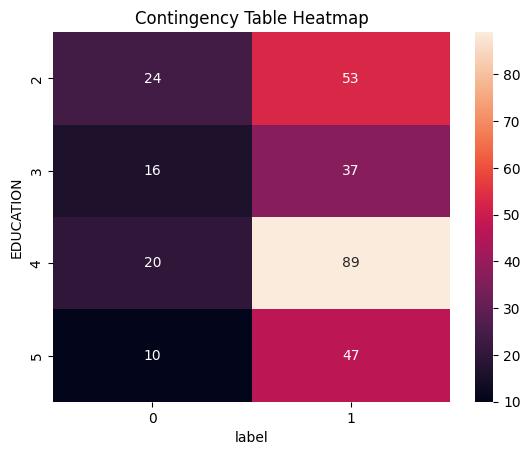

In [293]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap for the contingency table
sns.heatmap(contingency_table_filtered, annot=True, fmt='d')
plt.title("Contingency Table Heatmap")
plt.show()

### Chi-Square test

In [294]:
# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table_filtered)

# Print the results in a readable format
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table_filtered.index, 
                   columns=contingency_table_filtered.columns).round(2))

        Chi-Squared Test Results        
Test Statistic (Chi2):    6.5394
Degrees of Freedom:       3
p-value:                  8.8120e-02

Expected Frequencies (rounded):
label          0      1
EDUCATION              
2          18.21  58.79
3          12.53  40.47
4          25.78  83.22
5          13.48  43.52


### Result: almost close, but not. 

### Political leaning

In [295]:
# Create a contingency table
contingency_table = pd.crosstab(data['POLITICAL'], data['label'])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results in a readable format
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table.index, 
                   columns=contingency_table.columns).round(2))

        Chi-Squared Test Results        
Test Statistic (Chi2):    1.5194
Degrees of Freedom:       4
p-value:                  8.2320e-01

Expected Frequencies (rounded):
label          0      1
POLITICAL              
1           7.86  25.14
2          24.06  76.94
3          28.11  89.89
4           8.82  28.18
5           2.14   6.86


* The assumptions about the expected frequency is met. 

In [296]:
# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results in a readable format
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table.index, 
                   columns=contingency_table.columns).round(2))

        Chi-Squared Test Results        
Test Statistic (Chi2):    1.5194
Degrees of Freedom:       4
p-value:                  8.2320e-01

Expected Frequencies (rounded):
label          0      1
POLITICAL              
1           7.86  25.14
2          24.06  76.94
3          28.11  89.89
4           8.82  28.18
5           2.14   6.86


**Result**: The political leaning shows no significant difference between clusters.

### Question 2
"How could we improve gender equality at work?"

In [322]:
# convert list to numpy array to make an input to embeddings
emb_2['q2'] = emb_2['q2'].apply(np.array)  
matrix = np.vstack(emb_2['q2'].values)
matrix.shape

(298, 768)

In [323]:
X = matrix.copy()

## Dimensionality reduction (umap)

In [324]:
# Step 1: Normalize the data
from sklearn.preprocessing import StandardScaler
normalized_embeddings = StandardScaler().fit_transform(X)

In [325]:
# Step 2: Apply UMAP for dimensionality reduction
umap_model = UMAP(n_neighbors=10, min_dist=0.1, n_components=2, random_state = 42)
umap_embeddings = umap_model.fit_transform(normalized_embeddings)
X = umap_embeddings.copy()

/mnt/home/kim/venvs/my_environment/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [326]:
# Step 3: Use silhouette score to find optimal number of clusters
silhouette_scores = []
for num_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, cluster_labels))

optimal_num_clusters = silhouette_scores.index(max(silhouette_scores)) + 2

The last line derives from the fact that silhouette score is calculated from the num_cluster 2, so therefore if retrieving index of the lists, the first element's index is 0 but it indicates the value of num_cluster 2, therefore +2 would make it easier to retrieve the value. 


In [327]:
optimal_num_clusters

2

In [328]:
# Use Elbow-analysis as well to find optimal number of clusters
# Elbow analysis
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 20)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(np.sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = np.sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

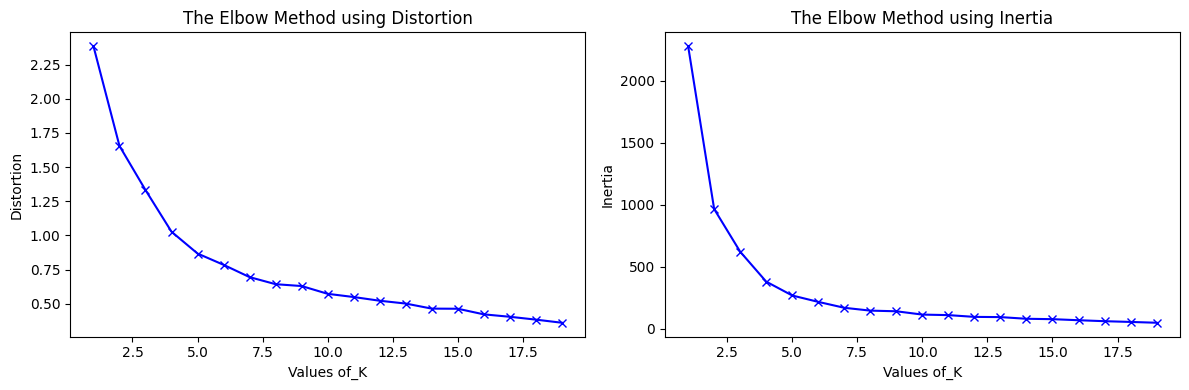

In [329]:
# Create a figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))  # Adjust figsize as needed

# Plot the first plot on ax1
ax1.plot(K, distortions, 'bx-')
ax1.set_xlabel('Values of_K')
ax1.set_ylabel('Distortion')
ax1.set_title('The Elbow Method using Distortion')


# Plot the second plot on ax2
ax2.plot(K, inertias, 'bx-')
ax2.set_xlabel('Values of_K')
ax2.set_ylabel('Inertia')
ax2.set_title('The Elbow Method using Inertia')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

Define the number of clusters for the clustering method combining the result of the graphs and the value of variable optimal_num_clusters

## KMeans clustering

In [330]:
# Step 4: Perform final clustering
final_kmeans = KMeans(n_clusters=3, random_state=0) # random_state fixed to 0, n_cluster changed
final_cluster_labels = final_kmeans.fit_predict(X)

# Save the result of clustering with random state 0 as a dataframe column
emb_2['label'] = final_cluster_labels  

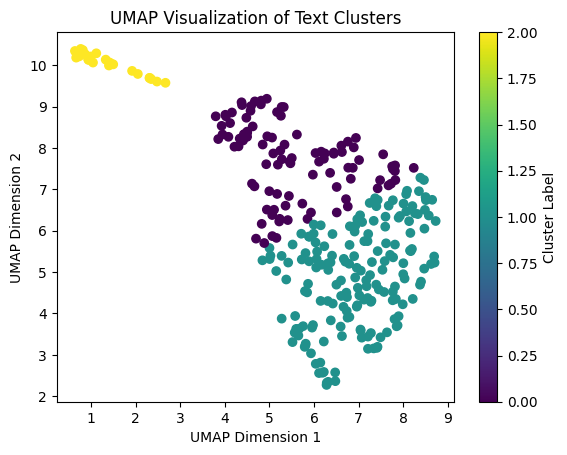

In [331]:
# Visualize clustering depending on different random states.
figures = [] # list to hold different figures. 

fig1, ax1 = plt.subplots()
scatter = ax1.scatter(X[:, 0], X[:, 1], c=final_cluster_labels, cmap='viridis')
ax1.set_xlabel('UMAP Dimension 1')
ax1.set_ylabel('UMAP Dimension 2')
ax1.set_title('UMAP Visualization of Text Clusters')

colorbar = plt.colorbar(scatter, ax=ax1)
colorbar.set_label('Cluster Label')

figures.append(fig1)

In [332]:
# Cluster labels obtained from clustering algorithm

final_cluster_labels # cluster_labels_from_bert
X # contextualized tokens of the input texts.

# Specify the question that is addressed. 
print("\n\"Question 2\"\n")

# Calculate Silhouette Coefficient
silhouette = silhouette_score(X, final_cluster_labels)
print(f"Silhouette Coefficient: {silhouette}")

# Calculate Calinski-Harabasz Index
calinski = calinski_harabasz_score(X, final_cluster_labels)
print(f"Calinski-Harabasz Index: {calinski}")

# Calculate Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(X, final_cluster_labels)
print(f"Davies-Bouldin Index: {davies_bouldin}")


"Question 2"

Silhouette Coefficient: 0.4473593235015869
Calinski-Harabasz Index: 385.298651975008
Davies-Bouldin Index: 0.7152998334679496


### connect it with the demographics

In [333]:
result_2 = pd.merge(emb_2, demos, on = 'index')

In [334]:
result_2

,q2,index,label,AGE,GENDER,EDUCATION,EMPLOYMENT,INCOME,POLITICAL,DAT,CRT2
0,"[-1.2141312807, -0.3966640457, -1.041425444200...",00278,1,24,1,5,1,3,2,74.104969,3
1,"[-0.5131815745, 0.03307634779999999, -1.231779...",0068d,1,74,1,2,7,2,4,79.882640,2
2,"[-1.3075574189, -0.6642389744000001, -0.764599...",00f13,1,43,1,4,1,3,3,77.948290,3
3,"[-0.8068943293999999, -0.212616943, -0.5477841...",01cb6,0,56,3,2,8,1,1,78.969095,2
4,"[-0.6015553623000001, -0.6008553245, -1.315350...",02670,1,25,1,5,1,2,2,83.311323,1
...,...,...,...,...,...,...,...,...,...,...,...
293,"[-1.1544252187000001, -0.18673033649999998, -0...",f92a4,0,35,1,5,1,3,3,65.242337,2
294,"[-0.521263361, -0.26593752940000004, -0.844210...",f9fd8,0,50,1,4,8,2,2,80.076401,1
295,"[-0.23314341900000002, -0.2036617603, -0.34013...",fb2a2,0,38,1,2,8,1,3,78.420482,0
296,"[-1.1611104236, -0.3523380244, -1.2341921628, ...",fb9c4,1,21,1,4,8,3,2,83.133171,1


## Hypothesis testing

In [335]:
data = result_2

In [336]:
from scipy.stats import chi2_contingency
import statsmodels.api as sm

## ANOVA

### Age

In [337]:
from scipy.stats import levene, f_oneway
import statsmodels.api as sm
from statsmodels.stats.anova import AnovaRM
from statsmodels.stats.oneway import anova_oneway

In [338]:
# split the dataset for the analysis

grouped_data = [data['AGE'][data['label'] == cluster] for cluster in data['label'].unique()]

### Levene's Test + ANOVA

In [339]:
# Perform Levene's test
levene_stat, levene_p = levene(*grouped_data)

print(f"Levene's Test Statistic: {levene_stat}")
print(f"P-Value: {levene_p}")

# Check the result of Levene's test
if levene_p > 0.05:
    print("Variances are equal across groups (p > 0.05), you can proceed with ANOVA.\n")
    
    # Perform ANOVA
    anova_stat, anova_p = f_oneway(*grouped_data)
    
    print(f"ANOVA Test Statistic: {anova_stat}")
    print(f"P-Value: {anova_p}")
    
    if anova_p < 0.05:
        print("There is a significant difference in age across clusters (p < 0.05).")
    else:
        print("There is no significant difference in age across clusters (p > 0.05).")
else:
    print("Variances are not equal across groups (p <= 0.05), consider using a different test like Welch's ANOVA.")

Levene's Test Statistic: 0.8609611994334315
P-Value: 0.4238150131612478
Variances are equal across groups (p > 0.05), you can proceed with ANOVA.

ANOVA Test Statistic: 1.4163837539621726
P-Value: 0.2442344893680897
There is no significant difference in age across clusters (p > 0.05).


### DAT

In [340]:
# split the dataset for the analysis

grouped_data = [data['DAT'][data['label'] == cluster] for cluster in data['label'].unique()]

### Levene's Test

In [347]:
# Perform Levene's test
levene_stat, levene_p = levene(*grouped_data)

print(f"Levene's Test Statistic: {levene_stat}")
print(f"P-Value: {levene_p}")

# Check the result of Levene's test
if levene_p > 0.05:
    print("Variances are equal across groups (p > 0.05), you can proceed with ANOVA.\n")
    
    # Perform ANOVA
    anova_stat, anova_p = f_oneway(*grouped_data)
    
    print(f"ANOVA Test Statistic: {anova_stat}")
    print(f"P-Value: {anova_p}")
    
    if anova_p < 0.05:
        print("There is a significant difference in dat across clusters (p < 0.05).")
    else:
        print("There is no significant difference in dat across clusters (p > 0.05).")
else:
    print("Variances are not equal across groups (p <= 0.05), consider using a different test like Welch's ANOVA.")

Levene's Test Statistic: 2.04569442420703
P-Value: 0.13112053633030757
Variances are equal across groups (p > 0.05), you can proceed with ANOVA.

ANOVA Test Statistic: 4.8207487952122605
P-Value: 0.008706843964931533
There is a significant difference in dat across clusters (p < 0.05).


### CRT

In [342]:
# split the dataset for the analysis

grouped_data = [data['CRT2'][data['label'] == cluster] for cluster in data['label'].unique()]

### Levene's Test

In [346]:
# Perform Levene's test
levene_stat, levene_p = levene(*grouped_data)

print(f"Levene's Test Statistic: {levene_stat}")
print(f"P-Value: {levene_p}")

# Check the result of Levene's test
if levene_p > 0.05:
    print("Variances are equal across groups (p > 0.05), you can proceed with ANOVA.\n")
    
    # Perform ANOVA
    anova_stat, anova_p = f_oneway(*grouped_data)
    
    print(f"ANOVA Test Statistic: {anova_stat}")
    print(f"P-Value: {anova_p}")
    
    if anova_p < 0.05:
        print("There is a significant difference in crt across clusters (p < 0.05).")
    else:
        print("There is no significant difference in crt across clusters (p > 0.05).")
else:
    print("Variances are not equal across groups (p <= 0.05), consider using a different test like Welch's ANOVA.")

Levene's Test Statistic: 2.04569442420703
P-Value: 0.13112053633030757
Variances are equal across groups (p > 0.05), you can proceed with ANOVA.

ANOVA Test Statistic: 4.8207487952122605
P-Value: 0.008706843964931533
There is a significant difference in crt across clusters (p < 0.05).


## Chi-Square Test
### Check the expected frequency
* It is supposed to be, Every cell > 0, 80% of the cells >= 5

In [348]:
from scipy.stats import chi2_contingency
import statsmodels.api as sm

### Gender

In [349]:
# Create a contingency table
contingency_table = pd.crosstab(data['GENDER'], data['label'])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results in a readable format
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table.index, 
                   columns=contingency_table.columns).round(2))

        Chi-Squared Test Results        
Test Statistic (Chi2):    1.6865
Degrees of Freedom:       6
p-value:                  9.4616e-01

Expected Frequencies (rounded):
label       0      1      2
GENDER                     
1       49.15  88.67  13.17
2        0.33   0.59   0.09
3       47.20  85.15  12.65
5        0.33   0.59   0.09


### Cut off the dataset

In [350]:
contingency_table_filtered = contingency_table.loc[[1, 3]]

In [351]:
# Perform Chi-Square test
chi2_statistic, p_value, dof, expected = chi2_contingency(contingency_table_filtered)

# Print the results
print("Expected Frequencies:")
print(expected)

# Check if all expected frequencies are >= 5
if np.all(expected >= 5):
    print("All expected frequencies are >= 5. The Chi-Square test can be used.")
else:
    print("Some expected frequencies are < 5. Check if the cells <5 are more than 20% of the entire cells. Then consider using Fisher's Exact Test or combining categories.")

Expected Frequencies:
[[49.48310811 88.25337838 13.26351351]
 [47.51689189 84.74662162 12.73648649]]
All expected frequencies are >= 5. The Chi-Square test can be used.


In [352]:
# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table_filtered)

# Print the results in a readable format
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table_filtered.index, 
                   columns=contingency_table_filtered.columns).round(2))

        Chi-Squared Test Results        
Test Statistic (Chi2):    0.2696
Degrees of Freedom:       2
p-value:                  8.7388e-01

Expected Frequencies (rounded):
label       0      1      2
GENDER                     
1       49.48  88.25  13.26
3       47.52  84.75  12.74


**Result:** p value is not below 0.05, therefore there is no significant difference in age by clusters.

### Income

In [353]:
# Create a contingency table
contingency_table = pd.crosstab(data['INCOME'], data['label'])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results in a readable format
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table.index, 
                   columns=contingency_table.columns).round(2))

        Chi-Squared Test Results        
Test Statistic (Chi2):    9.3660
Degrees of Freedom:       8
p-value:                  3.1237e-01

Expected Frequencies (rounded):
label       0      1     2
INCOME                    
1       24.09  43.46  6.46
2       37.11  66.95  9.95
3       19.20  34.65  5.15
4       13.02  23.49  3.49
5        3.58   6.46  0.96


**RESULT:** Expected frequency meets the assumptions, so it is valid analysis

* Income shows NO significant difference between the clusters

### Employment -> expected frequency was not good, could not finish.

In [354]:
# Create a contingency table
contingency_table = pd.crosstab(data['EMPLOYMENT'], data['label'])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results in a readable format
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table.index, 
                   columns=contingency_table.columns).round(2))

        Chi-Squared Test Results        
Test Statistic (Chi2):    8.7353
Degrees of Freedom:       14
p-value:                  8.4762e-01

Expected Frequencies (rounded):
label           0      1     2
EMPLOYMENT                    
1           35.81  64.60  9.60
2           13.35  24.08  3.58
3            4.23   7.63  1.13
4           14.00  25.25  3.75
5            5.21   9.40  1.40
6            5.86  10.57  1.57
7           13.67  24.66  3.66
8            4.88   8.81  1.31


* Assumption is bit met, but not so valid for the Chi-Square.

### Education

In [355]:
# Create a contingency table
contingency_table = pd.crosstab(data['EDUCATION'], data['label'])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results in a readable format
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table.index, 
                   columns=contingency_table.columns).round(2))

        Chi-Squared Test Results        
Test Statistic (Chi2):    19.0896
Degrees of Freedom:       8
p-value:                  1.4388e-02

Expected Frequencies (rounded):
label          0      1     2
EDUCATION                    
2          25.39  45.81  6.81
3          17.58  31.71  4.71
4          35.15  63.42  9.42
5          18.23  32.89  4.89
6           0.65   1.17  0.17


In [356]:
# filter only the 1,2 voted participants
contingency_table_filtered = contingency_table.loc[[2, 3, 4, 5]]

In [357]:
contingency_table_filtered

label,0,1,2
EDUCATION,,,
2,38,32,8
3,19,31,4
4,26,75,7
5,13,36,7


In [358]:
# Perform Chi-Square test
chi2_statistic, p_value, dof, expected = chi2_contingency(contingency_table_filtered)

# Print the results
print("Expected Frequencies:")
print(expected)

# Check if all expected frequencies are >= 5
if np.all(expected >= 5):
    print("All expected frequencies are >= 5. The Chi-Square test can be used.")
else:
    print("Some expected frequencies are < 5. Check if the cells <5 are more than 20% of the entire cells. Then consider using Fisher's Exact Test or combining categories.")

Expected Frequencies:
[[25.2972973  45.85135135  6.85135135]
 [17.51351351 31.74324324  4.74324324]
 [35.02702703 63.48648649  9.48648649]
 [18.16216216 32.91891892  4.91891892]]
Some expected frequencies are < 5. Check if the cells <5 are more than 20% of the entire cells. Then consider using Fisher's Exact Test or combining categories.


* Assumption is met regarding the expected frequency

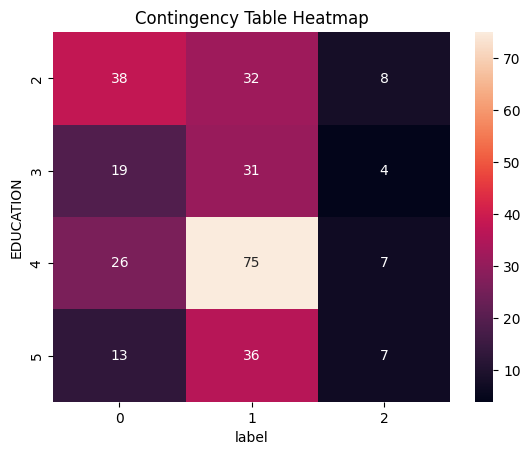

In [359]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap for the contingency table
sns.heatmap(contingency_table_filtered, annot=True, fmt='d')
plt.title("Contingency Table Heatmap")
plt.show()

### Chi-Square test

In [361]:
# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table_filtered)

# Print the results in a readable format
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table_filtered.index, 
                   columns=contingency_table_filtered.columns).round(2))

        Chi-Squared Test Results        
Test Statistic (Chi2):    18.7177
Degrees of Freedom:       6
p-value:                  4.6679e-03

Expected Frequencies (rounded):
label          0      1     2
EDUCATION                    
2          25.30  45.85  6.85
3          17.51  31.74  4.74
4          35.03  63.49  9.49
5          18.16  32.92  4.92


### Influence of a label on the overall chi-square test: residuals calculations

In [362]:
# Calculate the residuals
residuals = contingency_table_filtered - expected

# Standardize the residuals
standardized_residuals = residuals / np.sqrt(expected)

# Convert to DataFrame for better readability
standardized_residuals_df = pd.DataFrame(standardized_residuals,
                                         index=contingency_table_filtered.index,
                                         columns=contingency_table_filtered.columns)

# Print results
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table_filtered.index, 
                   columns=contingency_table_filtered.columns).round(2))
print("\nStandardized Residuals:")
print(standardized_residuals_df.round(2))

# Optional: if you want to see which residuals are extreme
print("\nExtreme Standardized Residuals (|value| > 2):")
print(standardized_residuals_df[standardized_residuals_df.abs() > 2].dropna(how='all'))


        Chi-Squared Test Results        
Test Statistic (Chi2):    18.7177
Degrees of Freedom:       6
p-value:                  4.6679e-03

Expected Frequencies (rounded):
label          0      1     2
EDUCATION                    
2          25.30  45.85  6.85
3          17.51  31.74  4.74
4          35.03  63.49  9.49
5          18.16  32.92  4.92

Standardized Residuals:
label         0     1     2
EDUCATION                  
2          2.53 -2.05  0.44
3          0.36 -0.13 -0.34
4         -1.53  1.44 -0.81
5         -1.21  0.54  0.94

Extreme Standardized Residuals (|value| > 2):
label             0         1   2
EDUCATION                        
2          2.525568 -2.045578 NaN


**Result:**
* Assumption: expected frequency is met
* p is below 0.05 -> reject the null-hypothesis
* The distribution of the feature(**education**) **is significantly different** across different clusters. 
* Looking at the Residuals, Community 0 is overrerpesented for label 2. And Community 1 is underrepresented for the label 2. Two Communities show the opposite distributions in terms of the education. 

### Pairwise Comparison with residuals interpretation

In [363]:
import itertools
from statsmodels.stats.multitest import multipletests

In [364]:
# Get all unique pairs of columns (communities)
pairs = list(itertools.combinations(contingency_table_filtered.columns, 2))

# Store results for pairwise comparisons
pairwise_results = []
pairwise_residuals = {}

In [365]:
# Perform pairwise chi-squared tests
for pair in pairs:
    # Create a contingency table for each pair of communities
    pair_table = contingency_table_filtered.loc[:, pair]
    
    # Perform chi-squared test
    chi2_pair, p_pair, dof_pair, expected = chi2_contingency(pair_table)
    
    # Calculate residuals and standardized residuals
    residuals = pair_table - expected
    standardized_residuals = residuals / np.sqrt(expected)
    
    # Append results
    pairwise_results.append((pair, chi2_pair, p_pair))
    pairwise_residuals[pair] = standardized_residuals

In [366]:
# Extract p-values for correction
p_values = [result[2] for result in pairwise_results]

In [367]:
# Apply Bonferroni correction
adjusted_p_values = multipletests(p_values, method='bonferroni')[1]

In [368]:
# Print pairwise results with adjusted p-values
print("\nPairwise Chi-Squared Test Results (with Bonferroni correction):")
print("="*65)
print(f"{'Community Pair':<25}{'Chi2':<10}{'p-value':<15}{'Adj. p-value':<15}")
print("-"*65)

for i, (pair, chi2_pair, p_pair) in enumerate(pairwise_results):
    print(f"{str(pair):<25}{chi2_pair:<10.4f}{p_pair:<15.4e}{adjusted_p_values[i]:<15.4e}")


Pairwise Chi-Squared Test Results (with Bonferroni correction):
Community Pair           Chi2      p-value        Adj. p-value   
-----------------------------------------------------------------
(0, 1)                   16.8341   7.6450e-04     2.2935e-03     
(0, 2)                   2.8672    4.1256e-01     1.0000e+00     
(1, 2)                   3.6626    3.0028e-01     9.0084e-01     


* Result: Comparing pairwise, 
    * (0, 1) community: adjusted p-value < 0.05 --- significant difference
    * (0, 2) community: adjusted p-value > 0.05 --- no significant difference
    * (1, 2) community: adjusted p-value > 0.05 --- no significant difference

In [369]:
# Print standardized residuals for each pairwise comparison
print("\nStandardized Residuals for Each Pairwise Comparison:")
for pair, residuals_df in pairwise_residuals.items():
    print(f"\nPair: {pair}")
    print(pd.DataFrame(residuals_df, index=contingency_table_filtered.index, columns=pair).round(2))


Standardized Residuals for Each Pairwise Comparison:

Pair: (0, 1)
              0     1
EDUCATION            
2          2.63 -1.95
3          0.29 -0.22
4         -1.65  1.23
5         -1.06  0.79

Pair: (0, 2)
              0     2
EDUCATION            
2          0.30 -0.58
3          0.21 -0.41
4          0.01 -0.01
5         -0.69  1.33

Pair: (1, 2)
              1     2
EDUCATION            
2         -0.47  1.23
3          0.10 -0.26
4          0.43 -1.12
5         -0.23  0.60


**Interpretation: Residuals**
* Pair (0, 1): Community 0 is overrepresented with label 2, and Community 1 is underrepresented for label 2. 
* Pair (0, 2): The residuals are closer to the 0, meaning the community 0 and 2 distributions are quite similar with minor deviations. 
* Pair (1, 2): Community 2 shows bigger deviations compared to the Community 1, but their distributions are not very different with each other.  

### Political leaning

In [370]:
# Create a contingency table
contingency_table = pd.crosstab(data['POLITICAL'], data['label'])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results in a readable format
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table.index, 
                   columns=contingency_table.columns).round(2))

        Chi-Squared Test Results        
Test Statistic (Chi2):    11.2835
Degrees of Freedom:       8
p-value:                  1.8615e-01

Expected Frequencies (rounded):
label          0      1      2
POLITICAL                     
1          10.74  19.38   2.88
2          32.55  58.72   8.72
3          38.41  69.30  10.30
4          12.37  22.32   3.32
5           2.93   5.29   0.79


* The assumptions about the expected frequency is met. 

In [371]:
# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results in a readable format
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table.index, 
                   columns=contingency_table.columns).round(2))

        Chi-Squared Test Results        
Test Statistic (Chi2):    11.2835
Degrees of Freedom:       8
p-value:                  1.8615e-01

Expected Frequencies (rounded):
label          0      1      2
POLITICAL                     
1          10.74  19.38   2.88
2          32.55  58.72   8.72
3          38.41  69.30  10.30
4          12.37  22.32   3.32
5           2.93   5.29   0.79


**Result**: The political leaning shows no significant difference between clusters.

### Influence of a label on the overall chi-square test: residuals calculations

In [372]:
# Calculate the residuals
residuals = contingency_table - expected

# Standardize the residuals
standardized_residuals = residuals / np.sqrt(expected)

# Convert to DataFrame for better readability
standardized_residuals_df = pd.DataFrame(standardized_residuals,
                                         index=contingency_table.index,
                                         columns=contingency_table.columns)

# Print results
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table.index, 
                   columns=contingency_table.columns).round(2))
print("\nStandardized Residuals:")
print(standardized_residuals_df.round(2))

# Optional: if you want to see which residuals are extreme
print("\nExtreme Standardized Residuals (|value| > 2):")
print(standardized_residuals_df[standardized_residuals_df.abs() > 2].dropna(how='all'))


        Chi-Squared Test Results        
Test Statistic (Chi2):    11.2835
Degrees of Freedom:       8
p-value:                  1.8615e-01

Expected Frequencies (rounded):
label          0      1      2
POLITICAL                     
1          10.74  19.38   2.88
2          32.55  58.72   8.72
3          38.41  69.30  10.30
4          12.37  22.32   3.32
5           2.93   5.29   0.79

Standardized Residuals:
label         0     1     2
POLITICAL                  
1         -0.53  0.82 -1.11
2         -0.80  0.56  0.09
3          1.06 -0.88  0.22
4          0.75 -0.49 -0.17
5         -1.71  0.75  1.37

Extreme Standardized Residuals (|value| > 2):
Empty DataFrame
Columns: [0, 1, 2]
Index: []


**Result**:
* There is no extreme values of residuals found. 

### Question 3
"How could we prevent the extinction of the elephant?"

In [309]:
# convert list to numpy array to make an input to embeddings
emb_3['q3'] = emb_3['q3'].apply(np.array)  
matrix = np.vstack(emb_3['q3'].values)
matrix.shape

(299, 768)

In [310]:
X = matrix.copy()

## Dimensionality reduction (umap)

In [311]:
# Step 1: Normalize the data
from sklearn.preprocessing import StandardScaler
normalized_embeddings = StandardScaler().fit_transform(X)

In [312]:
# Step 2: Apply UMAP for dimensionality reduction
umap_model = UMAP(n_neighbors=10, min_dist=0.1, n_components=2, random_state = 42)
umap_embeddings = umap_model.fit_transform(normalized_embeddings)
X = umap_embeddings.copy()

/mnt/home/kim/venvs/my_environment/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [313]:
# Step 3: Use silhouette score to find optimal number of clusters
silhouette_scores = []
for num_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, cluster_labels))

optimal_num_clusters = silhouette_scores.index(max(silhouette_scores)) + 2

The last line derives from the fact that silhouette score is calculated from the num_cluster 2, so therefore if retrieving index of the lists, the first element's index is 0 but it indicates the value of num_cluster 2, therefore +2 would make it easier to retrieve the value. 


In [314]:
optimal_num_clusters

2

In [315]:
# Use Elbow-analysis as well to find optimal number of clusters
# Elbow analysis
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 20)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(np.sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = np.sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

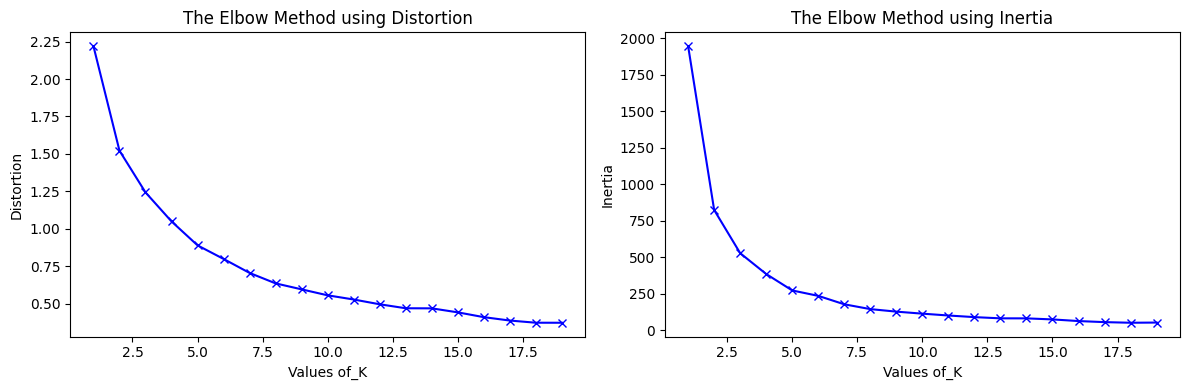

In [316]:
# Create a figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))  # Adjust figsize as needed

# Plot the first plot on ax1
ax1.plot(K, distortions, 'bx-')
ax1.set_xlabel('Values of_K')
ax1.set_ylabel('Distortion')
ax1.set_title('The Elbow Method using Distortion')


# Plot the second plot on ax2
ax2.plot(K, inertias, 'bx-')
ax2.set_xlabel('Values of_K')
ax2.set_ylabel('Inertia')
ax2.set_title('The Elbow Method using Inertia')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

Define the number of clusters for the clustering method combining the result of the graphs and the value of variable optimal_num_clusters

## KMeans clustering

In [317]:
# Step 4: Perform final clustering
final_kmeans = KMeans(n_clusters=2, random_state=0) # random_state fixed to 0, n_cluster changed
final_cluster_labels = final_kmeans.fit_predict(X)

# Save the result of clustering with random state 0 as a dataframe column
emb_3['label'] = final_cluster_labels  

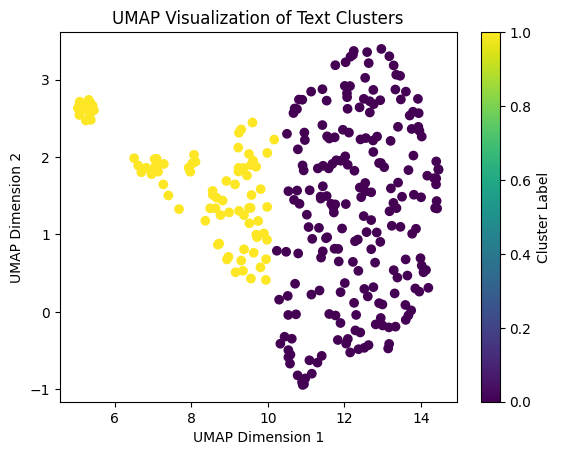

In [318]:
# Visualize clustering depending on different random states.
figures = [] # list to hold different figures. 

fig1, ax1 = plt.subplots()
scatter = ax1.scatter(X[:, 0], X[:, 1], c=final_cluster_labels, cmap='viridis')
ax1.set_xlabel('UMAP Dimension 1')
ax1.set_ylabel('UMAP Dimension 2')
ax1.set_title('UMAP Visualization of Text Clusters')

colorbar = plt.colorbar(scatter, ax=ax1)
colorbar.set_label('Cluster Label')

figures.append(fig1)

In [319]:
# Cluster labels obtained from clustering algorithm

final_cluster_labels # cluster_labels_from_bert
X # contextualized tokens of the input texts.

# Specify the question that is addressed. 
print("\n\"Question 3\"\n")

# Calculate Silhouette Coefficient
silhouette = silhouette_score(X, final_cluster_labels)
print(f"Silhouette Coefficient: {silhouette}")

# Calculate Calinski-Harabasz Index
calinski = calinski_harabasz_score(X, final_cluster_labels)
print(f"Calinski-Harabasz Index: {calinski}")

# Calculate Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(X, final_cluster_labels)
print(f"Davies-Bouldin Index: {davies_bouldin}")


"Question 3"

Silhouette Coefficient: 0.5106713771820068
Calinski-Harabasz Index: 405.14230596788514
Davies-Bouldin Index: 0.7205645727924661


In [84]:
result_3 = pd.merge(emb_3, demos, on = 'index')

In [85]:
result_3

,q3,index,label,AGE,GENDER,EDUCATION,EMPLOYMENT,INCOME,POLITICAL,DAT,CRT2
0,"[-0.7340224422, -0.3061131761, -0.756310321400...",00278,0,24,1,5,1,3,2,74.104969,3
1,"[-0.9260629415, -0.31008225300000003, -0.79693...",0068d,0,74,1,2,7,2,4,79.882640,2
2,"[-1.1262988449, -0.327856335, -1.5954943002000...",00f13,0,43,1,4,1,3,3,77.948290,3
3,"[-1.4942730218000002, -0.5724436902000001, -0....",01cb6,2,56,3,2,8,1,1,78.969095,2
4,"[-1.321283929, -0.4331608913, -1.4636231512000...",02670,2,25,1,5,1,2,2,83.311323,1
...,...,...,...,...,...,...,...,...,...,...,...
294,"[-1.0282919407, -0.26570346770000003, -0.68033...",f92a4,0,35,1,5,1,3,3,65.242337,2
295,"[-1.0885975305, -0.14420212790000003, -1.01005...",f9fd8,0,50,1,4,8,2,2,80.076401,1
296,"[-0.5618598014, -0.49979085460000006, -0.34124...",fb2a2,0,38,1,2,8,1,3,78.420482,0
297,"[-0.9470972270000001, -0.4887284935, -1.386553...",fb9c4,2,21,1,4,8,3,2,83.133171,1


## Hypothesis testing

In [202]:
data = result_3

## ANOVA

### Age

In [203]:
from scipy.stats import levene, f_oneway
import statsmodels.api as sm
from statsmodels.stats.anova import AnovaRM
from statsmodels.stats.oneway import anova_oneway

In [204]:
# split the dataset for the analysis

grouped_data = [data['AGE'][data['label'] == cluster] for cluster in data['label'].unique()]

### Levene's Test

In [205]:
# Perform Levene's test
levene_stat, levene_p = levene(*grouped_data)

print(f"Levene's Test Statistic: {levene_stat}")
print(f"P-Value: {levene_p}")

# Check the result of Levene's test
if levene_p > 0.05:
    print("Variances are equal across groups (p > 0.05), you can proceed with ANOVA.\n")
    
    # Perform ANOVA
    anova_stat, anova_p = f_oneway(*grouped_data)
    
    print(f"ANOVA Test Statistic: {anova_stat}")
    print(f"P-Value: {anova_p}")
    
    if anova_p < 0.05:
        print("There is a significant difference in age across clusters (p < 0.05).")
    else:
        print("There is no significant difference in age across clusters (p > 0.05).")
else:
    print("Variances are not equal across groups (p <= 0.05), consider using a different test like Welch's ANOVA.")

Levene's Test Statistic: 0.12055037865994933
P-Value: 0.8864759266118829
Variances are equal across groups (p > 0.05), you can proceed with ANOVA.

ANOVA Test Statistic: 0.8969614406210625
P-Value: 0.4089123975210949
There is no significant difference in age across clusters (p > 0.05).


### DAT

In [206]:
# split the dataset for the analysis

grouped_data = [data['DAT'][data['label'] == cluster] for cluster in data['label'].unique()]

### Levene's Test

In [320]:
# Perform Levene's test
levene_stat, levene_p = levene(*grouped_data)

print(f"Levene's Test Statistic: {levene_stat}")
print(f"P-Value: {levene_p}")

# Check the result of Levene's test
if levene_p > 0.05:
    print("Variances are equal across groups (p > 0.05), you can proceed with ANOVA.\n")
    
    # Perform ANOVA
    anova_stat, anova_p = f_oneway(*grouped_data)
    
    print(f"ANOVA Test Statistic: {anova_stat}")
    print(f"P-Value: {anova_p}")
    
    if anova_p < 0.05:
        print("There is a significant difference in dat across clusters (p < 0.05).")
    else:
        print("There is no significant difference in dat across clusters (p > 0.05).")
else:
    print("Variances are not equal across groups (p <= 0.05), consider using a different test like Welch's ANOVA.")

Levene's Test Statistic: 3.908242185380871
P-Value: 0.04897762278955891
Variances are not equal across groups (p <= 0.05), consider using a different test like Welch's ANOVA.


### CRT

In [208]:
# split the dataset for the analysis

grouped_data = [data['CRT2'][data['label'] == cluster] for cluster in data['label'].unique()]

### Levene's Test

In [209]:
# Perform Levene's test
levene_stat, levene_p = levene(*grouped_data)

print(f"Levene's Test Statistic: {levene_stat}")
print(f"P-Value: {levene_p}")

# Check the result of Levene's test
if levene_p > 0.05:
    print("Variances are equal across groups (p > 0.05), you can proceed with ANOVA.\n")
    
    # Perform ANOVA
    anova_stat, anova_p = f_oneway(*grouped_data)
    
    print(f"ANOVA Test Statistic: {anova_stat}")
    print(f"P-Value: {anova_p}")
    
    if anova_p < 0.05:
        print("There is a significant difference in crt across clusters (p < 0.05).")
    else:
        print("There is no significant difference in crt across clusters (p > 0.05).")
else:
    print("Variances are not equal across groups (p <= 0.05), consider using a different test like Welch's ANOVA.")

Levene's Test Statistic: 4.199340047786022
P-Value: 0.015909041809091484
Variances are not equal across groups (p <= 0.05), consider using a different test like Welch's ANOVA.


In [210]:
# Perform Welch's ANOVA
# anova_oneway method performs Welch's ANOVA when using welch=True
welch_anova = anova_oneway(data['CRT2'], data['label'], use_var='unequal')

# Extract and print the results
print(f"Welch's ANOVA Test Statistic: {welch_anova.statistic}")
print(f"P-Value: {welch_anova.pvalue}")

if welch_anova.pvalue < 0.05:
    print("There is a significant difference in crt across clusters (p < 0.05).")
else:
    print("There is no significant difference in crt across clusters (p > 0.05).")

Welch's ANOVA Test Statistic: 7.166104526204703
P-Value: 0.001268601762451076
There is a significant difference in age across clusters (p < 0.05).


## Chi-Square Test
### Check the expected frequency
* It is supposed to be, Every cell > 0, 80% of the cells >= 5

In [211]:
from scipy.stats import chi2_contingency
import statsmodels.api as sm

### Gender

In [212]:
# Create a contingency table
contingency_table = pd.crosstab(data['GENDER'], data['label'])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results in a readable format
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table.index, 
                   columns=contingency_table.columns).round(2))

        Chi-Squared Test Results        
Test Statistic (Chi2):    5.2307
Degrees of Freedom:       6
p-value:                  5.1458e-01

Expected Frequencies (rounded):
label       0      1      2
GENDER                     
1       54.39  18.81  78.80
2        0.36   0.12   0.52
3       51.89  17.94  75.17
5        0.36   0.12   0.52


### Cut off the dataset

In [213]:
contingency_table_filtered = contingency_table.loc[[1, 3]]

In [214]:
# Perform Chi-Square test
chi2_statistic, p_value, dof, expected = chi2_contingency(contingency_table_filtered)

# Print the results
print("Expected Frequencies:")
print(expected)

# Check if all expected frequencies are >= 5
if np.all(expected >= 5):
    print("All expected frequencies are >= 5. The Chi-Square test can be used.")
else:
    print("Some expected frequencies are < 5. Check if the cells <5 are more than 20% of the entire cells. Then consider using Fisher's Exact Test or combining categories.")

Expected Frequencies:
[[54.76094276 18.93602694 78.3030303 ]
 [52.23905724 18.06397306 74.6969697 ]]
All expected frequencies are >= 5. The Chi-Square test can be used.


In [215]:
# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table_filtered)

# Print the results in a readable format
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table_filtered.index, 
                   columns=contingency_table_filtered.columns).round(2))

        Chi-Squared Test Results        
Test Statistic (Chi2):    3.3557
Degrees of Freedom:       2
p-value:                  1.8678e-01

Expected Frequencies (rounded):
label       0      1     2
GENDER                    
1       54.76  18.94  78.3
3       52.24  18.06  74.7


**Result:** p value is not below 0.05, therefore there is no significant difference in age by clusters.

### Income

In [216]:
# Create a contingency table
contingency_table = pd.crosstab(data['INCOME'], data['label'])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results in a readable format
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table.index, 
                   columns=contingency_table.columns).round(2))

        Chi-Squared Test Results        
Test Statistic (Chi2):    11.4363
Degrees of Freedom:       8
p-value:                  1.7818e-01

Expected Frequencies (rounded):
label       0      1      2
INCOME                     
1       26.12   9.03  37.84
2       40.80  14.11  59.10
3       21.83   7.55  31.62
4       14.31   4.95  20.74
5        3.94   1.36   5.70


**RESULT:** Expected frequency meets the assumptions, so it is valid analysis

* Income shows NO significant difference between the clusters

### Employment -> expected frequency was not good, could not finish.

In [217]:
# Create a contingency table
contingency_table = pd.crosstab(data['EMPLOYMENT'], data['label'])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results in a readable format
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table.index, 
                   columns=contingency_table.columns).round(2))

        Chi-Squared Test Results        
Test Statistic (Chi2):    16.4661
Degrees of Freedom:       14
p-value:                  2.8574e-01

Expected Frequencies (rounded):
label           0      1      2
EMPLOYMENT                     
1           39.36  13.61  57.02
2           14.67   5.07  21.25
3            4.65   1.61   6.74
4           15.75   5.44  22.81
5            5.73   1.98   8.29
6            6.44   2.23   9.33
7           15.03   5.20  21.77
8            5.37   1.86   7.78


* Assumption is bit met, but not so valid for the Chi-Square.

### Education

In [218]:
# Create a contingency table
contingency_table = pd.crosstab(data['EDUCATION'], data['label'])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results in a readable format
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table.index, 
                   columns=contingency_table.columns).round(2))

        Chi-Squared Test Results        
Test Statistic (Chi2):    8.4967
Degrees of Freedom:       8
p-value:                  3.8651e-01

Expected Frequencies (rounded):
label          0      1      2
EDUCATION                     
2          27.91   9.65  40.43
3          19.32   6.68  27.99
4          39.01  13.49  56.51
5          20.04   6.93  29.03
6           0.72   0.25   1.04


In [219]:
# filter only the 1,2 voted participants
contingency_table_filtered = contingency_table.loc[[2, 3, 4, 5]]

In [220]:
contingency_table_filtered

label,0,1,2
EDUCATION,,,
2,29,12,37
3,25,6,23
4,35,11,63
5,18,7,31


In [221]:
# Perform Chi-Square test
chi2_statistic, p_value, dof, expected = chi2_contingency(contingency_table_filtered)

# Print the results
print("Expected Frequencies:")
print(expected)

# Check if all expected frequencies are >= 5
if np.all(expected >= 5):
    print("All expected frequencies are >= 5. The Chi-Square test can be used.")
else:
    print("Some expected frequencies are < 5. Check if the cells <5 are more than 20% of the entire cells. Then consider using Fisher's Exact Test or combining categories.")

Expected Frequencies:
[[28.1010101   9.45454545 40.44444444]
 [19.45454545  6.54545455 28.        ]
 [39.26936027 13.21212121 56.51851852]
 [20.17508418  6.78787879 29.03703704]]
All expected frequencies are >= 5. The Chi-Square test can be used.


* Assumption is met regarding the expected frequency

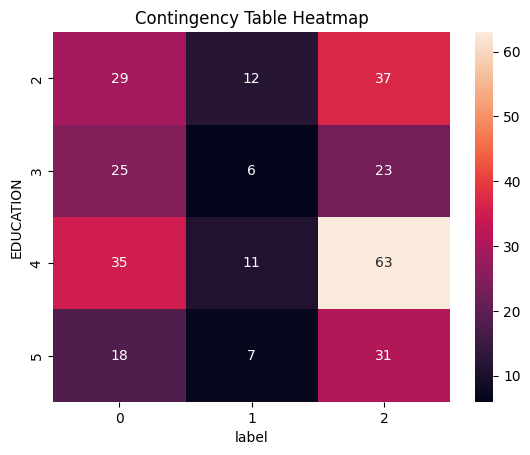

In [222]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap for the contingency table
sns.heatmap(contingency_table_filtered, annot=True, fmt='d')
plt.title("Contingency Table Heatmap")
plt.show()

### Chi-Square test

In [223]:
# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table_filtered)

# Print the results in a readable format
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table_filtered.index, 
                   columns=contingency_table_filtered.columns).round(2))

        Chi-Squared Test Results        
Test Statistic (Chi2):    5.4781
Degrees of Freedom:       6
p-value:                  4.8411e-01

Expected Frequencies (rounded):
label          0      1      2
EDUCATION                     
2          28.10   9.45  40.44
3          19.45   6.55  28.00
4          39.27  13.21  56.52
5          20.18   6.79  29.04


* Result: There is no significant difference between the clusters regarding 'education'

### Political leaning

In [224]:
# Create a contingency table
contingency_table = pd.crosstab(data['POLITICAL'], data['label'])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results in a readable format
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table.index, 
                   columns=contingency_table.columns).round(2))

        Chi-Squared Test Results        
Test Statistic (Chi2):    3.9262
Degrees of Freedom:       8
p-value:                  8.6372e-01

Expected Frequencies (rounded):
label          0      1      2
POLITICAL                     
1          11.81   4.08  17.11
2          35.79  12.37  51.84
3          42.59  14.73  61.69
4          13.60   4.70  19.70
5           3.22   1.11   4.67


* The assumptions about the expected frequency is met. 

In [225]:
# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results in a readable format
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table.index, 
                   columns=contingency_table.columns).round(2))

        Chi-Squared Test Results        
Test Statistic (Chi2):    3.9262
Degrees of Freedom:       8
p-value:                  8.6372e-01

Expected Frequencies (rounded):
label          0      1      2
POLITICAL                     
1          11.81   4.08  17.11
2          35.79  12.37  51.84
3          42.59  14.73  61.69
4          13.60   4.70  19.70
5           3.22   1.11   4.67


**Result**: The political leaning shows no significant difference between clusters.

### Question 4
"How could we increase the use of public transport?"

In [89]:
# convert list to numpy array to make an input to embeddings
emb_4['q4'] = emb_4['q4'].apply(np.array)  
matrix = np.vstack(emb_4['q4'].values)
matrix.shape

(296, 768)

In [90]:
X = matrix.copy()

## Dimensionality reduction (umap)

In [91]:
# Step 1: Normalize the data
from sklearn.preprocessing import StandardScaler
normalized_embeddings = StandardScaler().fit_transform(X)

In [92]:
# Step 2: Apply UMAP for dimensionality reduction
umap_model = UMAP(n_neighbors=10, min_dist=0.1, n_components=2, random_state = 42)
umap_embeddings = umap_model.fit_transform(normalized_embeddings)
X = umap_embeddings.copy()

/mnt/home/kim/venvs/my_environment/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [93]:
# Step 3: Use silhouette score to find optimal number of clusters
silhouette_scores = []
for num_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, cluster_labels))

optimal_num_clusters = silhouette_scores.index(max(silhouette_scores)) + 2

The last line derives from the fact that silhouette score is calculated from the num_cluster 2, so therefore if retrieving index of the lists, the first element's index is 0 but it indicates the value of num_cluster 2, therefore +2 would make it easier to retrieve the value. 


In [94]:
optimal_num_clusters

2

In [95]:
# Use Elbow-analysis as well to find optimal number of clusters
# Elbow analysis
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 20)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(np.sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = np.sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

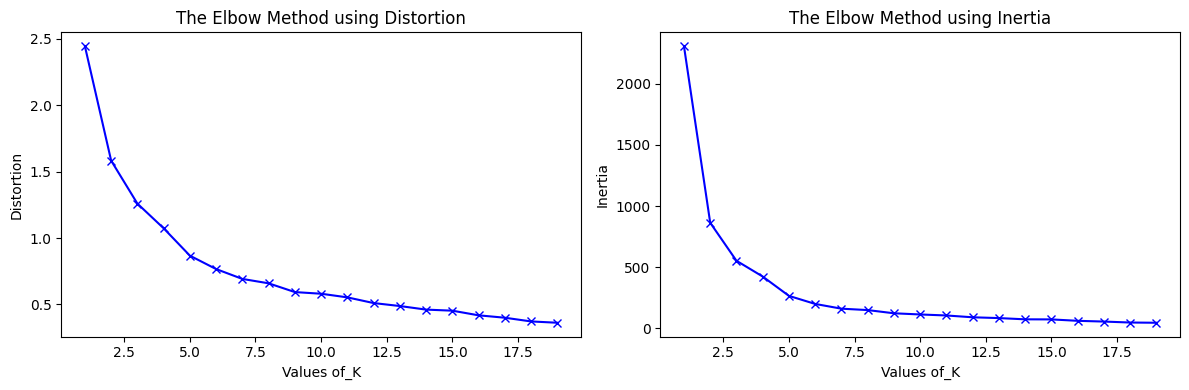

In [96]:
# Create a figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))  # Adjust figsize as needed

# Plot the first plot on ax1
ax1.plot(K, distortions, 'bx-')
ax1.set_xlabel('Values of_K')
ax1.set_ylabel('Distortion')
ax1.set_title('The Elbow Method using Distortion')


# Plot the second plot on ax2
ax2.plot(K, inertias, 'bx-')
ax2.set_xlabel('Values of_K')
ax2.set_ylabel('Inertia')
ax2.set_title('The Elbow Method using Inertia')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

Define the number of clusters for the clustering method combining the result of the graphs and the value of variable optimal_num_clusters

## KMeans clustering

In [97]:
# Step 4: Perform final clustering
final_kmeans = KMeans(n_clusters=2, random_state=0) # random_state fixed to 0, n_cluster changed
final_cluster_labels = final_kmeans.fit_predict(X)

# Save the result of clustering with random state 0 as a dataframe column
emb_4['label'] = final_cluster_labels  

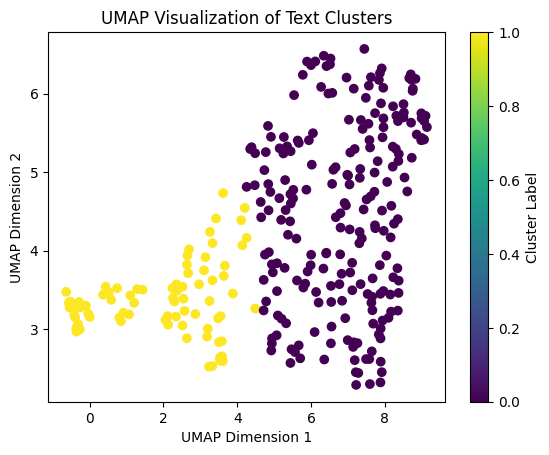

In [98]:
# Visualize clustering depending on different random states.
figures = [] # list to hold different figures. 

fig1, ax1 = plt.subplots()
scatter = ax1.scatter(X[:, 0], X[:, 1], c=final_cluster_labels, cmap='viridis')
ax1.set_xlabel('UMAP Dimension 1')
ax1.set_ylabel('UMAP Dimension 2')
ax1.set_title('UMAP Visualization of Text Clusters')

colorbar = plt.colorbar(scatter, ax=ax1)
colorbar.set_label('Cluster Label')

figures.append(fig1)

In [99]:
# Cluster labels obtained from clustering algorithm

final_cluster_labels # cluster_labels_from_bert
X # contextualized tokens of the input texts.

# Specify the question that is addressed. 
print("\n\"Question 4\"\n")

# Calculate Silhouette Coefficient
silhouette = silhouette_score(X, final_cluster_labels)
print(f"Silhouette Coefficient: {silhouette}")

# Calculate Calinski-Harabasz Index
calinski = calinski_harabasz_score(X, final_cluster_labels)
print(f"Calinski-Harabasz Index: {calinski}")

# Calculate Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(X, final_cluster_labels)
print(f"Davies-Bouldin Index: {davies_bouldin}")


"Question 4"

Silhouette Coefficient: 0.5509334206581116
Calinski-Harabasz Index: 491.1383478504328
Davies-Bouldin Index: 0.6171875170864034


In [100]:
result_4 = pd.merge(emb_4, demos, on = 'index')

In [101]:
result_4

,q4,index,label,AGE,GENDER,EDUCATION,EMPLOYMENT,INCOME,POLITICAL,DAT,CRT2
0,"[-0.7028733343000001, -0.5303636864000001, -0....",00278,0,24,1,5,1,3,2,74.104969,3
1,"[-0.5791567899, -0.5247273557000001, -0.035114...",0068d,0,74,1,2,7,2,4,79.882640,2
2,"[-0.8681718513000001, -0.49448729300000005, 0....",00f13,0,43,1,4,1,3,3,77.948290,3
3,"[-1.1998950988000001, -0.7587420120999999, 0.3...",01cb6,0,56,3,2,8,1,1,78.969095,2
4,"[-0.7811491788000001, -0.3411843391, 0.3132392...",02670,0,25,1,5,1,2,2,83.311323,1
...,...,...,...,...,...,...,...,...,...,...,...
291,"[-0.5758169871000001, -0.3721108939, -0.151374...",f92a4,0,35,1,5,1,3,3,65.242337,2
292,"[-0.8437795862999999, -0.39590567720000003, -0...",f9fd8,0,50,1,4,8,2,2,80.076401,1
293,"[-1.0595222563, -0.1097651906, -0.530222626400...",fb2a2,0,38,1,2,8,1,3,78.420482,0
294,"[-0.7773463651999999, -0.5351100275, -0.635484...",fb9c4,0,21,1,4,8,3,2,83.133171,1


## Hypothesis testing

In [249]:
data = result_4

## ANOVA

### Age

In [250]:
from scipy.stats import levene, f_oneway
import statsmodels.api as sm
from statsmodels.stats.anova import AnovaRM
from statsmodels.stats.oneway import anova_oneway

In [251]:
# split the dataset for the analysis

grouped_data = [data['AGE'][data['label'] == cluster] for cluster in data['label'].unique()]

### Levene's Test

In [252]:
# Perform Levene's test
levene_stat, levene_p = levene(*grouped_data)

print(f"Levene's Test Statistic: {levene_stat}")
print(f"P-Value: {levene_p}")

# Check the result of Levene's test
if levene_p > 0.05:
    print("Variances are equal across groups (p > 0.05), you can proceed with ANOVA.\n")
    
    # Perform ANOVA
    anova_stat, anova_p = f_oneway(*grouped_data)
    
    print(f"ANOVA Test Statistic: {anova_stat}")
    print(f"P-Value: {anova_p}")
    
    if anova_p < 0.05:
        print("There is a significant difference in age across clusters (p < 0.05).")
    else:
        print("There is no significant difference in age across clusters (p > 0.05).")
else:
    print("Variances are not equal across groups (p <= 0.05), consider using a different test like Welch's ANOVA.")

Levene's Test Statistic: 0.6422769321337501
P-Value: 0.4235347196765863
Variances are equal across groups (p > 0.05), you can proceed with ANOVA.

ANOVA Test Statistic: 0.5081717459545049
P-Value: 0.4764967667140503
There is no significant difference in age across clusters (p > 0.05).


### DAT

In [253]:
# split the dataset for the analysis

grouped_data = [data['DAT'][data['label'] == cluster] for cluster in data['label'].unique()]

### Levene's Test

In [254]:
# Perform Levene's test
levene_stat, levene_p = levene(*grouped_data)

print(f"Levene's Test Statistic: {levene_stat}")
print(f"P-Value: {levene_p}")

# Check the result of Levene's test
if levene_p > 0.05:
    print("Variances are equal across groups (p > 0.05), you can proceed with ANOVA.\n")
    
    # Perform ANOVA
    anova_stat, anova_p = f_oneway(*grouped_data)
    
    print(f"ANOVA Test Statistic: {anova_stat}")
    print(f"P-Value: {anova_p}")
    
    if anova_p < 0.05:
        print("There is a significant difference in age across clusters (p < 0.05).")
    else:
        print("There is no significant difference in age across clusters (p > 0.05).")
else:
    print("Variances are not equal across groups (p <= 0.05), consider using a different test like Welch's ANOVA.")

Levene's Test Statistic: 0.749370211452221
P-Value: 0.38738154046571227
Variances are equal across groups (p > 0.05), you can proceed with ANOVA.

ANOVA Test Statistic: 8.261965810588423
P-Value: 0.004343815404513456
There is a significant difference in age across clusters (p < 0.05).


### CRT

In [255]:
# split the dataset for the analysis

grouped_data = [data['CRT2'][data['label'] == cluster] for cluster in data['label'].unique()]

### Levene's Test

In [256]:
# Perform Levene's test
levene_stat, levene_p = levene(*grouped_data)

print(f"Levene's Test Statistic: {levene_stat}")
print(f"P-Value: {levene_p}")

# Check the result of Levene's test
if levene_p > 0.05:
    print("Variances are equal across groups (p > 0.05), you can proceed with ANOVA.\n")
    
    # Perform ANOVA
    anova_stat, anova_p = f_oneway(*grouped_data)
    
    print(f"ANOVA Test Statistic: {anova_stat}")
    print(f"P-Value: {anova_p}")
    
    if anova_p < 0.05:
        print("There is a significant difference in age across clusters (p < 0.05).")
    else:
        print("There is no significant difference in age across clusters (p > 0.05).")
else:
    print("Variances are not equal across groups (p <= 0.05), consider using a different test like Welch's ANOVA.")

Levene's Test Statistic: 4.1129995264797845
P-Value: 0.04345630235581983
Variances are not equal across groups (p <= 0.05), consider using a different test like Welch's ANOVA.


In [257]:
# Perform Welch's ANOVA
# anova_oneway method performs Welch's ANOVA when using welch=True
welch_anova = anova_oneway(data['CRT2'], data['label'], use_var='unequal')

# Extract and print the results
print(f"Welch's ANOVA Test Statistic: {welch_anova.statistic}")
print(f"P-Value: {welch_anova.pvalue}")

if welch_anova.pvalue < 0.05:
    print("There is a significant difference in age across clusters (p < 0.05).")
else:
    print("There is no significant difference in age across clusters (p > 0.05).")

Welch's ANOVA Test Statistic: 6.558240460264331
P-Value: 0.011677129405597788
There is a significant difference in age across clusters (p < 0.05).


## Chi-Square Test
### Check the expected frequency
* It is supposed to be, Every cell > 0, 80% of the cells >= 5

In [258]:
from scipy.stats import chi2_contingency
import statsmodels.api as sm

### Gender

In [259]:
# Create a contingency table
contingency_table = pd.crosstab(data['GENDER'], data['label'])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results in a readable format
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table.index, 
                   columns=contingency_table.columns).round(2))

        Chi-Squared Test Results        
Test Statistic (Chi2):    1.8776
Degrees of Freedom:       3
p-value:                  5.9820e-01

Expected Frequencies (rounded):
label        0      1
GENDER               
1       111.21  39.79
2         0.74   0.26
3       105.32  37.68
5         0.74   0.26


### Cut off the dataset

In [260]:
contingency_table_filtered = contingency_table.loc[[1, 3]]

In [261]:
# Perform Chi-Square test
chi2_statistic, p_value, dof, expected = chi2_contingency(contingency_table_filtered)

# Print the results
print("Expected Frequencies:")
print(expected)

# Check if all expected frequencies are >= 5
if np.all(expected >= 5):
    print("All expected frequencies are >= 5. The Chi-Square test can be used.")
else:
    print("Some expected frequencies are < 5. Check if the cells <5 are more than 20% of the entire cells. Then consider using Fisher's Exact Test or combining categories.")

Expected Frequencies:
[[110.93877551  40.06122449]
 [105.06122449  37.93877551]]
All expected frequencies are >= 5. The Chi-Square test can be used.


In [262]:
# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table_filtered)

# Print the results in a readable format
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table_filtered.index, 
                   columns=contingency_table_filtered.columns).round(2))

        Chi-Squared Test Results        
Test Statistic (Chi2):    0.8859
Degrees of Freedom:       1
p-value:                  3.4659e-01

Expected Frequencies (rounded):
label        0      1
GENDER               
1       110.94  40.06
3       105.06  37.94


**Result:** p value is not below 0.05, therefore there is no significant difference in gender by clusters.

### Income

In [263]:
# Create a contingency table
contingency_table = pd.crosstab(data['INCOME'], data['label'])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results in a readable format
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table.index, 
                   columns=contingency_table.columns).round(2))

        Chi-Squared Test Results        
Test Statistic (Chi2):    2.2883
Degrees of Freedom:       4
p-value:                  6.8290e-01

Expected Frequencies (rounded):
label       0      1
INCOME              
1       53.03  18.97
2       83.96  30.04
3       44.19  15.81
4       28.72  10.28
5        8.10   2.90


**RESULT:** Expected frequency meets the assumptions, so it is valid analysis

* Income shows NO significant difference between the clusters

### Employment -> expected frequency was not good, could not finish.

In [264]:
# Create a contingency table
contingency_table = pd.crosstab(data['EMPLOYMENT'], data['label'])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results in a readable format
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table.index, 
                   columns=contingency_table.columns).round(2))

        Chi-Squared Test Results        
Test Statistic (Chi2):    1.1454
Degrees of Freedom:       7
p-value:                  9.9213e-01

Expected Frequencies (rounded):
label           0      1
EMPLOYMENT              
1           80.28  28.72
2           29.46  10.54
3            9.57   3.43
4           32.41  11.59
5           11.78   4.22
6           12.52   4.48
7           30.93  11.07
8           11.05   3.95


* Assumption is bit met, but not so valid for the Chi-Square.

### Education

In [265]:
# Create a contingency table
contingency_table = pd.crosstab(data['EDUCATION'], data['label'])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results in a readable format
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table.index, 
                   columns=contingency_table.columns).round(2))

        Chi-Squared Test Results        
Test Statistic (Chi2):    7.6429
Degrees of Freedom:       4
p-value:                  1.0557e-01

Expected Frequencies (rounded):
label          0      1
EDUCATION              
2          57.45  20.55
3          39.03  13.97
4          80.28  28.72
5          39.77  14.23
6           1.47   0.53


In [266]:
# filter only the 1,2 voted participants
contingency_table_filtered = contingency_table.loc[[2, 3, 4, 5]]

In [267]:
contingency_table_filtered

label,0,1
EDUCATION,,
2,49,29
3,43,10
4,83,26
5,42,12


In [268]:
# Perform Chi-Square test
chi2_statistic, p_value, dof, expected = chi2_contingency(contingency_table_filtered)

# Print the results
print("Expected Frequencies:")
print(expected)

# Check if all expected frequencies are >= 5
if np.all(expected >= 5):
    print("All expected frequencies are >= 5. The Chi-Square test can be used.")
else:
    print("Some expected frequencies are < 5. Check if the cells <5 are more than 20% of the entire cells. Then consider using Fisher's Exact Test or combining categories.")

Expected Frequencies:
[[57.57142857 20.42857143]
 [39.11904762 13.88095238]
 [80.45238095 28.54761905]
 [39.85714286 14.14285714]]
All expected frequencies are >= 5. The Chi-Square test can be used.


* Assumption is met regarding the expected frequency

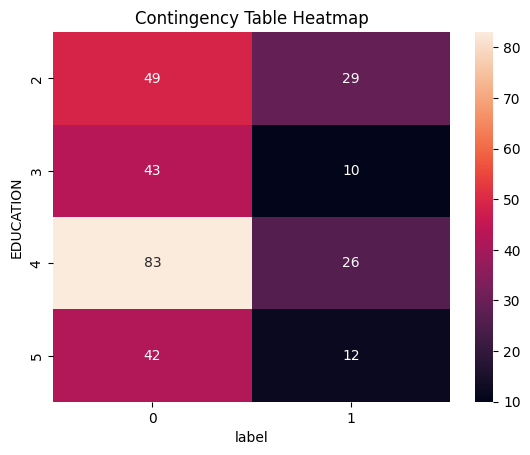

In [269]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap for the contingency table
sns.heatmap(contingency_table_filtered, annot=True, fmt='d')
plt.title("Contingency Table Heatmap")
plt.show()

### Chi-Square test

In [270]:
# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table_filtered)

# Print the results in a readable format
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table_filtered.index, 
                   columns=contingency_table_filtered.columns).round(2))

        Chi-Squared Test Results        
Test Statistic (Chi2):    7.0905
Degrees of Freedom:       3
p-value:                  6.9067e-02

Expected Frequencies (rounded):
label          0      1
EDUCATION              
2          57.57  20.43
3          39.12  13.88
4          80.45  28.55
5          39.86  14.14


### Result: very close to threshold but no significance strictly speaking

### Political leaning

In [271]:
# Create a contingency table
contingency_table = pd.crosstab(data['POLITICAL'], data['label'])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results in a readable format
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table.index, 
                   columns=contingency_table.columns).round(2))

        Chi-Squared Test Results        
Test Statistic (Chi2):    5.7151
Degrees of Freedom:       4
p-value:                  2.2146e-01

Expected Frequencies (rounded):
label          0      1
POLITICAL              
1          23.57   8.43
2          72.91  26.09
3          87.64  31.36
4          27.25   9.75
5           6.63   2.37


* The assumptions about the expected frequency is met. 

In [272]:
# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results in a readable format
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table.index, 
                   columns=contingency_table.columns).round(2))

        Chi-Squared Test Results        
Test Statistic (Chi2):    5.7151
Degrees of Freedom:       4
p-value:                  2.2146e-01

Expected Frequencies (rounded):
label          0      1
POLITICAL              
1          23.57   8.43
2          72.91  26.09
3          87.64  31.36
4          27.25   9.75
5           6.63   2.37


**Result**: The political leaning shows no significant difference between clusters.

### Question 5
"How could we reduce stress in our society?"

In [104]:
# convert list to numpy array to make an input to embeddings
emb_5['q5'] = emb_5['q5'].apply(np.array)  
matrix = np.vstack(emb_5['q5'].values)
matrix.shape

(298, 768)

In [105]:
X = matrix.copy()

## Dimensionality reduction (umap)

In [106]:
# Step 1: Normalize the data
from sklearn.preprocessing import StandardScaler
normalized_embeddings = StandardScaler().fit_transform(X)

In [107]:
# Step 2: Apply UMAP for dimensionality reduction
umap_model = UMAP(n_neighbors=10, min_dist=0.1, n_components=2, random_state = 42)
umap_embeddings = umap_model.fit_transform(normalized_embeddings)
X = umap_embeddings.copy()

/mnt/home/kim/venvs/my_environment/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [108]:
# Step 3: Use silhouette score to find optimal number of clusters
silhouette_scores = []
for num_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, cluster_labels))

optimal_num_clusters = silhouette_scores.index(max(silhouette_scores)) + 2

The last line derives from the fact that silhouette score is calculated from the num_cluster 2, so therefore if retrieving index of the lists, the first element's index is 0 but it indicates the value of num_cluster 2, therefore +2 would make it easier to retrieve the value. 


In [109]:
optimal_num_clusters

3

In [110]:
# Use Elbow-analysis as well to find optimal number of clusters
# Elbow analysis
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 20)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(np.sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = np.sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

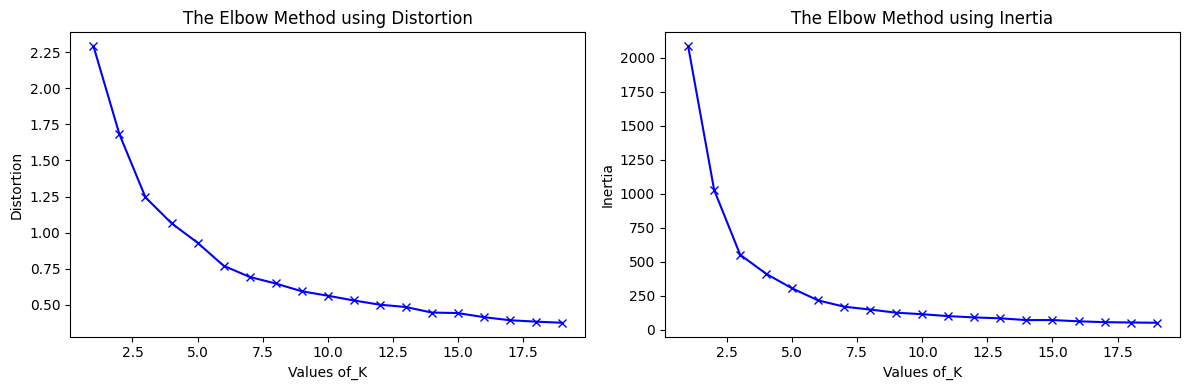

In [111]:
# Create a figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))  # Adjust figsize as needed

# Plot the first plot on ax1
ax1.plot(K, distortions, 'bx-')
ax1.set_xlabel('Values of_K')
ax1.set_ylabel('Distortion')
ax1.set_title('The Elbow Method using Distortion')


# Plot the second plot on ax2
ax2.plot(K, inertias, 'bx-')
ax2.set_xlabel('Values of_K')
ax2.set_ylabel('Inertia')
ax2.set_title('The Elbow Method using Inertia')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

Define the number of clusters for the clustering method combining the result of the graphs and the value of variable optimal_num_clusters

## KMeans clustering

In [137]:
# Step 4: Perform final clustering
final_kmeans = KMeans(n_clusters=3, random_state=0) # random_state fixed to 0, n_cluster changed
final_cluster_labels = final_kmeans.fit_predict(X)

# Save the result of clustering with random state 0 as a dataframe column
emb_5['label'] = final_cluster_labels  

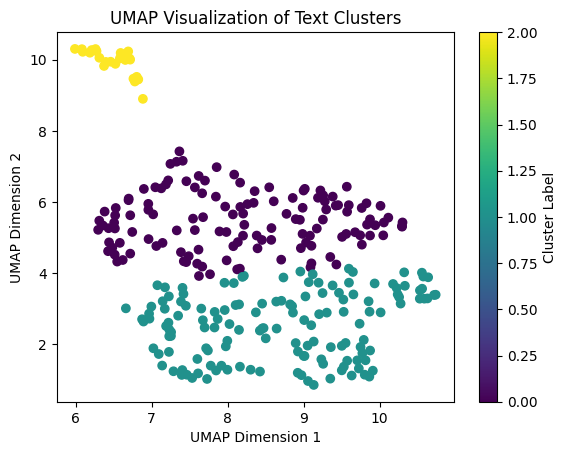

In [138]:
# Visualize clustering depending on different random states.
figures = [] # list to hold different figures. 

fig1, ax1 = plt.subplots()
scatter = ax1.scatter(X[:, 0], X[:, 1], c=final_cluster_labels, cmap='viridis')
ax1.set_xlabel('UMAP Dimension 1')
ax1.set_ylabel('UMAP Dimension 2')
ax1.set_title('UMAP Visualization of Text Clusters')

colorbar = plt.colorbar(scatter, ax=ax1)
colorbar.set_label('Cluster Label')

figures.append(fig1)

In [139]:
# Cluster labels obtained from clustering algorithm

final_cluster_labels # cluster_labels_from_bert
X # contextualized tokens of the input texts.

# Specify the question that is addressed. 
print("\n\"Question 5\"\n")

# Calculate Silhouette Coefficient
silhouette = silhouette_score(X, final_cluster_labels)
print(f"Silhouette Coefficient: {silhouette}")

# Calculate Calinski-Harabasz Index
calinski = calinski_harabasz_score(X, final_cluster_labels)
print(f"Calinski-Harabasz Index: {calinski}")

# Calculate Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(X, final_cluster_labels)
print(f"Davies-Bouldin Index: {davies_bouldin}")


"Question 5"

Silhouette Coefficient: 0.4710547924041748
Calinski-Harabasz Index: 411.51115235036497
Davies-Bouldin Index: 0.7160304363174735


In [140]:
result_5 = pd.merge(emb_5, demos, on = 'index')

In [141]:
result_5

,q5,index,label,AGE,GENDER,EDUCATION,EMPLOYMENT,INCOME,POLITICAL,DAT,CRT2
0,"[-0.988017559, -0.51460783, -0.523574616800000...",00278,1,24,1,5,1,3,2,74.104969,3
1,"[-0.3682377925, -0.5639116094000001, -0.476926...",0068d,1,74,1,2,7,2,4,79.882640,2
2,"[-1.2099347115, -0.5444229883999999, -0.759294...",00f13,0,43,1,4,1,3,3,77.948290,3
3,"[-1.0570166409000001, -0.6063647438, -0.364495...",01cb6,1,56,3,2,8,1,1,78.969095,2
4,"[-0.476063069, -0.145485105, -0.9858790412, -0...",02670,1,25,1,5,1,2,2,83.311323,1
...,...,...,...,...,...,...,...,...,...,...,...
293,"[-0.8031209987000001, -0.3841569946, -0.715483...",f92a4,1,35,1,5,1,3,3,65.242337,2
294,"[-1.2761859894, -0.2611043286, -0.836083896399...",f9fd8,1,50,1,4,8,2,2,80.076401,1
295,"[-0.613320507, -0.7602634505000001, -0.5676356...",fb2a2,1,38,1,2,8,1,3,78.420482,0
296,"[-0.682406433, -0.6035129501000001, -0.7114950...",fb9c4,1,21,1,4,8,3,2,83.133171,1


## Hypothesis testing

In [155]:
data = result_5

## ANOVA

### Age

In [168]:
from scipy.stats import levene, f_oneway
import statsmodels.api as sm
from statsmodels.stats.anova import AnovaRM
from statsmodels.stats.oneway import anova_oneway

In [161]:
# split the dataset for the analysis

grouped_data = [data['AGE'][data['label'] == cluster] for cluster in data['label'].unique()]

### Levene's Test

In [163]:
# Perform Levene's test
levene_stat, levene_p = levene(*grouped_data)

print(f"Levene's Test Statistic: {levene_stat}")
print(f"P-Value: {levene_p}")

# Check the result of Levene's test
if levene_p > 0.05:
    print("Variances are equal across groups (p > 0.05), you can proceed with ANOVA.\n")
    
    # Perform ANOVA
    anova_stat, anova_p = f_oneway(*grouped_data)
    
    print(f"ANOVA Test Statistic: {anova_stat}")
    print(f"P-Value: {anova_p}")
    
    if anova_p < 0.05:
        print("There is a significant difference in age across clusters (p < 0.05).")
    else:
        print("There is no significant difference in age across clusters (p > 0.05).")
else:
    print("Variances are not equal across groups (p <= 0.05), consider using a different test like Welch's ANOVA.")

Levene's Test Statistic: 0.009679645522173687
P-Value: 0.9903673659937688
Variances are equal across groups (p > 0.05), you can proceed with ANOVA.

ANOVA Test Statistic: 0.16052064722552672
P-Value: 0.8517745795143093
There is no significant difference in age across clusters (p > 0.05).


### DAT

In [166]:
# split the dataset for the analysis

grouped_data = [data['DAT'][data['label'] == cluster] for cluster in data['label'].unique()]

### Levene's Test

In [167]:
# Perform Levene's test
levene_stat, levene_p = levene(*grouped_data)

print(f"Levene's Test Statistic: {levene_stat}")
print(f"P-Value: {levene_p}")

# Check the result of Levene's test
if levene_p > 0.05:
    print("Variances are equal across groups (p > 0.05), you can proceed with ANOVA.\n")
    
    # Perform ANOVA
    anova_stat, anova_p = f_oneway(*grouped_data)
    
    print(f"ANOVA Test Statistic: {anova_stat}")
    print(f"P-Value: {anova_p}")
    
    if anova_p < 0.05:
        print("There is a significant difference in age across clusters (p < 0.05).")
    else:
        print("There is no significant difference in age across clusters (p > 0.05).")
else:
    print("Variances are not equal across groups (p <= 0.05), consider using a different test like Welch's ANOVA.")

Levene's Test Statistic: 7.326122499665085
P-Value: 0.0007848704640916638
Variances are not equal across groups (p <= 0.05), consider using a different test like Welch's ANOVA.


In [169]:
# Perform Welch's ANOVA
# anova_oneway method performs Welch's ANOVA when using welch=True
welch_anova = anova_oneway(data['DAT'], data['label'], use_var='unequal')

# Extract and print the results
print(f"Welch's ANOVA Test Statistic: {welch_anova.statistic}")
print(f"P-Value: {welch_anova.pvalue}")

if welch_anova.pvalue < 0.05:
    print("There is a significant difference in age across clusters (p < 0.05).")
else:
    print("There is no significant difference in age across clusters (p > 0.05).")

Welch's ANOVA Test Statistic: 4.72753331092171
P-Value: 0.012256852729113666
There is a significant difference in age across clusters (p < 0.05).


### CRT

In [171]:
# split the dataset for the analysis

grouped_data = [data['CRT2'][data['label'] == cluster] for cluster in data['label'].unique()]

### Levene's Test

In [172]:
# Perform Levene's test
levene_stat, levene_p = levene(*grouped_data)

print(f"Levene's Test Statistic: {levene_stat}")
print(f"P-Value: {levene_p}")

# Check the result of Levene's test
if levene_p > 0.05:
    print("Variances are equal across groups (p > 0.05), you can proceed with ANOVA.\n")
    
    # Perform ANOVA
    anova_stat, anova_p = f_oneway(*grouped_data)
    
    print(f"ANOVA Test Statistic: {anova_stat}")
    print(f"P-Value: {anova_p}")
    
    if anova_p < 0.05:
        print("There is a significant difference in age across clusters (p < 0.05).")
    else:
        print("There is no significant difference in age across clusters (p > 0.05).")
else:
    print("Variances are not equal across groups (p <= 0.05), consider using a different test like Welch's ANOVA.")

Levene's Test Statistic: 4.9934521088361175
P-Value: 0.00736667633050752
Variances are not equal across groups (p <= 0.05), consider using a different test like Welch's ANOVA.


In [173]:
# Perform Welch's ANOVA
# anova_oneway method performs Welch's ANOVA when using welch=True
welch_anova = anova_oneway(data['CRT2'], data['label'], use_var='unequal')

# Extract and print the results
print(f"Welch's ANOVA Test Statistic: {welch_anova.statistic}")
print(f"P-Value: {welch_anova.pvalue}")

if welch_anova.pvalue < 0.05:
    print("There is a significant difference in age across clusters (p < 0.05).")
else:
    print("There is no significant difference in age across clusters (p > 0.05).")

Welch's ANOVA Test Statistic: 3.4870519554872623
P-Value: 0.03626035690712895
There is a significant difference in age across clusters (p < 0.05).


## Chi-Square Test
### Check the expected frequency
* It is supposed to be, Every cell > 0, 80% of the cells >= 5

In [142]:
from scipy.stats import chi2_contingency
import statsmodels.api as sm

### Gender

In [174]:
# Create a contingency table
contingency_table = pd.crosstab(data['GENDER'], data['label'])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results in a readable format
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table.index, 
                   columns=contingency_table.columns).round(2))

        Chi-Squared Test Results        
Test Statistic (Chi2):    4.1900
Degrees of Freedom:       6
p-value:                  6.5099e-01

Expected Frequencies (rounded):
label       0      1      2
GENDER                     
1       65.37  72.46  13.17
2        0.43   0.48   0.09
3       62.77  69.58  12.65
5        0.43   0.48   0.09


### Cut off the dataset

In [175]:
contingency_table_filtered = contingency_table.loc[[1, 3]]

In [176]:
# Perform Chi-Square test
chi2_statistic, p_value, dof, expected = chi2_contingency(contingency_table_filtered)

# Print the results
print("Expected Frequencies:")
print(expected)

# Check if all expected frequencies are >= 5
if np.all(expected >= 5):
    print("All expected frequencies are >= 5. The Chi-Square test can be used.")
else:
    print("Some expected frequencies are < 5. Check if the cells <5 are more than 20% of the entire cells. Then consider using Fisher's Exact Test or combining categories.")

Expected Frequencies:
[[65.80743243 71.92905405 13.26351351]
 [63.19256757 69.07094595 12.73648649]]
All expected frequencies are >= 5. The Chi-Square test can be used.


In [153]:
# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table_filtered)

# Print the results in a readable format
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table_filtered.index, 
                   columns=contingency_table_filtered.columns).round(2))

        Chi-Squared Test Results        
Test Statistic (Chi2):    2.0086
Degrees of Freedom:       2
p-value:                  3.6629e-01

Expected Frequencies (rounded):
label       0      1      2
GENDER                     
1       65.81  71.93  13.26
3       63.19  69.07  12.74


**Result:** p value is not below 0.05, therefore there is no significant difference in age by clusters.

### Income

In [149]:
# Create a contingency table
contingency_table = pd.crosstab(data['INCOME'], data['label'])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results in a readable format
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table.index, 
                   columns=contingency_table.columns).round(2))

        Chi-Squared Test Results        
Test Statistic (Chi2):    12.5363
Degrees of Freedom:       8
p-value:                  1.2883e-01

Expected Frequencies (rounded):
label       0      1     2
INCOME                    
1       32.03  35.51  6.46
2       48.92  54.22  9.86
3       25.97  28.79  5.23
4       17.32  19.19  3.49
5        4.76   5.28  0.96


**RESULT:** Expected frequency meets the assumptions, so it is valid analysis

* Income shows NO significant difference between the clusters

### Employment -> expected frequency was not good, could not finish.

In [143]:
# Create a contingency table
contingency_table = pd.crosstab(data['EMPLOYMENT'], data['label'])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results in a readable format
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table.index, 
                   columns=contingency_table.columns).round(2))

        Chi-Squared Test Results        
Test Statistic (Chi2):    9.4293
Degrees of Freedom:       14
p-value:                  8.0261e-01

Expected Frequencies (rounded):
label           0      1     2
EMPLOYMENT                    
1           48.05  53.27  9.68
2           17.75  19.67  3.58
3            5.63   6.24  1.13
4           19.05  21.11  3.84
5            6.93   7.68  1.40
6            6.93   7.68  1.40
7           18.18  20.15  3.66
8            6.49   7.20  1.31


In [146]:
contingency_table_filtered

label,0,1,2
EMPLOYMENT,,,
1,52,50,9
2,19,18,4
4,17,23,4
5,9,4,3
6,6,9,1
7,18,21,3


In [147]:
# Perform Chi-Square test
chi2_statistic, p_value, dof, expected = chi2_contingency(contingency_table_filtered)

# Print the results
print("Expected Frequencies:")
print(expected)

# Check if all expected frequencies are >= 5
if np.all(expected >= 5):
    print("All expected frequencies are >= 5. The Chi-Square test can be used.")
else:
    print("Some expected frequencies are < 5. Check if the cells <5 are more than 20% of the entire cells. Then consider using Fisher's Exact Test or combining categories.")

Expected Frequencies:
[[49.74444444 51.38888889  9.86666667]
 [18.37407407 18.98148148  3.64444444]
 [19.71851852 20.37037037  3.91111111]
 [ 7.17037037  7.40740741  1.42222222]
 [ 7.17037037  7.40740741  1.42222222]
 [18.82222222 19.44444444  3.73333333]]
Some expected frequencies are < 5. Check if the cells <5 are more than 20% of the entire cells. Then consider using Fisher's Exact Test or combining categories.


* Assumption is met regarding the expected frequency

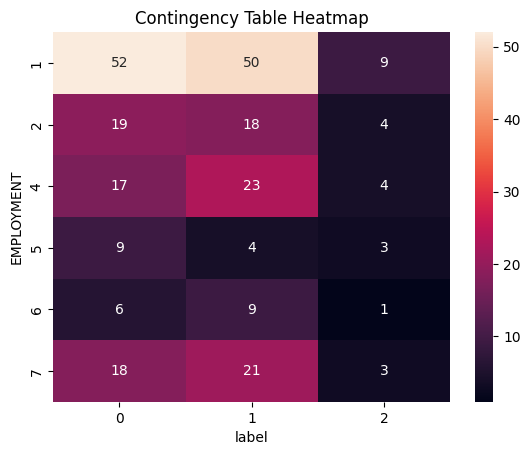

In [148]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap for the contingency table
sns.heatmap(contingency_table_filtered, annot=True, fmt='d')
plt.title("Contingency Table Heatmap")
plt.show()

### Education

In [130]:
# Create a contingency table
contingency_table = pd.crosstab(data['EDUCATION'], data['label'])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results in a readable format
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table.index, 
                   columns=contingency_table.columns).round(2))

        Chi-Squared Test Results        
Test Statistic (Chi2):    16.5465
Degrees of Freedom:       16
p-value:                  4.1551e-01

Expected Frequencies (rounded):
label          0      1      2     3      4
EDUCATION                                  
2          16.54  18.09  18.09  6.72  17.57
3          11.60  12.68  12.68  4.71  12.32
4          23.19  25.37  25.37  9.42  24.64
5          12.24  13.39  13.39  4.97  13.01
6           0.43   0.47   0.47  0.17   0.46


In [131]:
# filter only the 1,2 voted participants
contingency_table_filtered = contingency_table.loc[[2, 3, 4, 5]]

In [132]:
contingency_table_filtered

label,0,1,2,3,4
EDUCATION,,,,,
2,15,17,24,10,11
3,12,12,17,3,10
4,23,26,21,8,30
5,13,15,8,5,16


In [133]:
# Perform Chi-Square test
chi2_statistic, p_value, dof, expected = chi2_contingency(contingency_table_filtered)

# Print the results
print("Expected Frequencies:")
print(expected)

# Check if all expected frequencies are >= 5
if np.all(expected >= 5):
    print("All expected frequencies are >= 5. The Chi-Square test can be used.")
else:
    print("Some expected frequencies are < 5. Check if the cells <5 are more than 20% of the entire cells. Then consider using Fisher's Exact Test or combining categories.")

Expected Frequencies:
[[16.38851351 18.20945946 18.20945946  6.76351351 17.42905405]
 [11.49324324 12.77027027 12.77027027  4.74324324 12.22297297]
 [22.98648649 25.54054054 25.54054054  9.48648649 24.44594595]
 [12.13175676 13.47972973 13.47972973  5.00675676 12.90202703]]
Some expected frequencies are < 5. Check if the cells <5 are more than 20% of the entire cells. Then consider using Fisher's Exact Test or combining categories.


* Assumption is met regarding the expected frequency

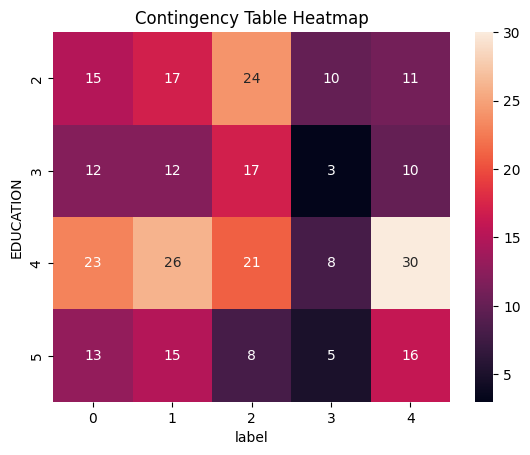

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap for the contingency table
sns.heatmap(contingency_table_filtered, annot=True, fmt='d')
plt.title("Contingency Table Heatmap")
plt.show()

### Chi-Square test

In [135]:
# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table_filtered)

# Print the results in a readable format
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table_filtered.index, 
                   columns=contingency_table_filtered.columns).round(2))

        Chi-Squared Test Results        
Test Statistic (Chi2):    13.9896
Degrees of Freedom:       12
p-value:                  3.0137e-01

Expected Frequencies (rounded):
label          0      1      2     3      4
EDUCATION                                  
2          16.39  18.21  18.21  6.76  17.43
3          11.49  12.77  12.77  4.74  12.22
4          22.99  25.54  25.54  9.49  24.45
5          12.13  13.48  13.48  5.01  12.90


**Result**: It says, EDUCATION shows NO significant difference between the clusters

### Political leaning

In [117]:
# Create a contingency table
contingency_table = pd.crosstab(data['POLITICAL'], data['label'])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results in a readable format
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table.index, 
                   columns=contingency_table.columns).round(2))

        Chi-Squared Test Results        
Test Statistic (Chi2):    14.0022
Degrees of Freedom:       16
p-value:                  5.9855e-01

Expected Frequencies (rounded):
label          0      1      2      3      4
POLITICAL                                   
1           6.87   7.52   7.52   2.79   7.30
2          21.48  23.49  23.49   8.72  22.82
3          25.56  27.95  27.95  10.38  27.15
4           8.16   8.93   8.93   3.32   8.67
5           1.93   2.11   2.11   0.79   2.05


**Result**: The assumptions about the expected frequency is not met

### Cut off the dataset

In [119]:
# filter only the 1,2 voted participants

contingency_table_filtered = contingency_table.loc[[1, 2, 3, 4]]

In [120]:
contingency_table_filtered

label,0,1,2,3,4
POLITICAL,,,,,
1,7,8,11,1,5
2,20,29,18,9,24
3,27,25,27,12,28
4,6,6,13,3,10


In [123]:
# Perform Chi-Square test
chi2_statistic, p_value, dof, expected = chi2_contingency(contingency_table_filtered)

# Print the results
print("Expected Frequencies:")
print(expected)

# Check if all expected frequencies are >= 5
if np.all(expected >= 5):
    print("All expected frequencies are >= 5. The Chi-Square test can be used.")
else:
    print("Some expected frequencies are < 5. Check if the cells <5 are more than 20% of the entire cells. Then consider using Fisher's Exact Test or combining categories.")

Expected Frequencies:
[[ 6.64359862  7.52941176  7.64013841  2.76816609  7.41868512]
 [20.76124567 23.52941176 23.87543253  8.65051903 23.183391  ]
 [24.70588235 28.         28.41176471 10.29411765 27.58823529]
 [ 7.88927336  8.94117647  9.07266436  3.28719723  8.80968858]]
Some expected frequencies are < 5. Check if the cells <5 are more than 20% of the entire cells. Then consider using Fisher's Exact Test or combining categories.


* Assumption is met regarding the expected frequency

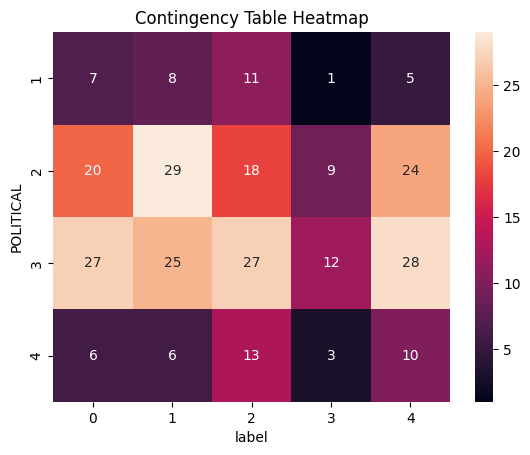

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap for the contingency table
sns.heatmap(contingency_table_filtered, annot=True, fmt='d')
plt.title("Contingency Table Heatmap")
plt.show()

### Chi-Square test

In [126]:
# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table_filtered)

# Print the results in a readable format
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table_filtered.index, 
                   columns=contingency_table_filtered.columns).round(2))

        Chi-Squared Test Results        
Test Statistic (Chi2):    10.4320
Degrees of Freedom:       12
p-value:                  5.7812e-01

Expected Frequencies (rounded):
label          0      1      2      3      4
POLITICAL                                   
1           6.64   7.53   7.64   2.77   7.42
2          20.76  23.53  23.88   8.65  23.18
3          24.71  28.00  28.41  10.29  27.59
4           7.89   8.94   9.07   3.29   8.81


**Result**: It says, the presidential shows NO significant difference between the clusters

# Demographic information

### Age

In [42]:
age = demos['AGE']

In [43]:
# delete the null valued rows in the column 'age'
age = age.dropna()

In [44]:
# mean, var, std
print("mean of age:", np.mean(age))
print("variance of age:", np.var(age))
print("standard deviation of age:", np.std(age))

mean of age: 45.86666666666667
variance of age: 244.02888888888884
standard deviation of age: 15.621424035243678


In [45]:
# Dataframe age with each communities
age_0 = age.loc[list(communities[0])]
age_1 = age.loc[list(communities[1])]
age_2 = age.loc[list(communities[2])]

# print cardinality, mean, var, std within the cluster.
# community_0
print("*community_0 in age")
print("how many:", len(age_0))
print("mean:", np.mean(age_0))
print("variance:", np.var(age_0))
print("std:", np.std(age_0))

# community_1
print("\n*community_1 in age ")
print("how many:", len(age_1))
print("mean:", np.mean(age_1))
print("variance:", np.var(age_1))
print("std:", np.std(age_1))

# community_2
print("\n*community_2 in age ")
print("how many:", len(age_2))
print("mean:", np.mean(age_2))
print("variance:", np.var(age_2))
print("std:", np.std(age_2))


*community_0 in age
how many: 122
mean: 45.10655737704918
variance: 242.39028486965873
std: 15.568888363324426

*community_1 in age 
how many: 94
mean: 46.851063829787236
variance: 248.08420099592576
std: 15.750688905439208

*community_2 in age 
how many: 74
mean: 46.0
variance: 232.3783783783784
std: 15.24396203020653


(array([ 4.,  4.,  7.,  5.,  6.,  5.,  3.,  5.,  2.,  5.,  5.,  4.,  5.,
         2.,  4.,  1.,  9.,  3.,  3.,  8., 10.,  3.,  5.,  5.,  4.,  1.,
         3.,  0.,  0.,  1.]),
 array([19.        , 20.96666667, 22.93333333, 24.9       , 26.86666667,
        28.83333333, 30.8       , 32.76666667, 34.73333333, 36.7       ,
        38.66666667, 40.63333333, 42.6       , 44.56666667, 46.53333333,
        48.5       , 50.46666667, 52.43333333, 54.4       , 56.36666667,
        58.33333333, 60.3       , 62.26666667, 64.23333333, 66.2       ,
        68.16666667, 70.13333333, 72.1       , 74.06666667, 76.03333333,
        78.        ]),
 <BarContainer object of 30 artists>)

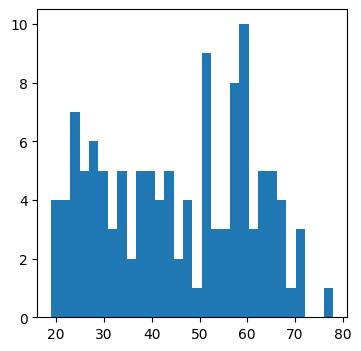

In [46]:
# it is the example below, use to see another community as well.
# Histogram of age in community 0
plt.rcParams["figure.figsize"] = (4,4) # set the figure size
plt.hist(age_0, bins = 30)

### Gender

In [47]:
gender = demos['GENDER']
gender = gender.dropna()
gender

PARTICIPANT_ID
00278    1
0068d    1
00f13    1
01cb6    3
02670    1
        ..
f92a4    1
f9fd8    1
fb2a2    1
fb9c4    1
ff2bf    1
Name: GENDER, Length: 300, dtype: int64

In [48]:
# Dataframe gender with each communities
gender_0 = gender.loc[list(communities[0])]
gender_1 = gender.loc[list(communities[1])]
gender_2 = gender.loc[list(communities[2])]

print("How many in gender belong to community 0:", len(gender_0))
print("How many in gender belong to community 1:", len(gender_1))
print("How many in gender belong to community 2:", len(gender_2))

How many in gender belong to community 0: 122
How many in gender belong to community 1: 94
How many in gender belong to community 2: 74


(array([56.,  0.,  1.,  0., 64.,  0.,  0.,  1.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 8 artists>)

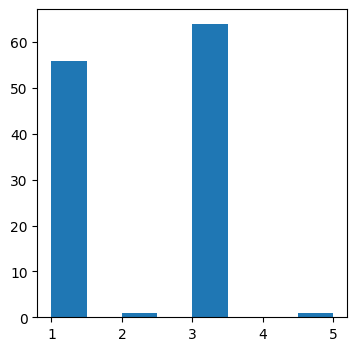

In [49]:
# it is the example below, use to see another community as well.
# Histogram of gender in community 0
plt.rcParams["figure.figsize"] = (4,4) # set the figure size
plt.hist(gender_0, bins = 8)

(array([57.,  0.,  0.,  0.,  0.,  0.,  0., 37.]),
 array([1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 , 2.75, 3.  ]),
 <BarContainer object of 8 artists>)

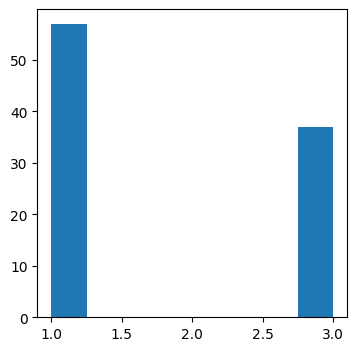

In [50]:
# it is the example below, use to see another community as well.
# Histogram of gender in community 1
plt.rcParams["figure.figsize"] = (4,4) # set the figure size
plt.hist(gender_1, bins = 8)

(array([35.,  0.,  0.,  0.,  0.,  0.,  0., 39.]),
 array([1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 , 2.75, 3.  ]),
 <BarContainer object of 8 artists>)

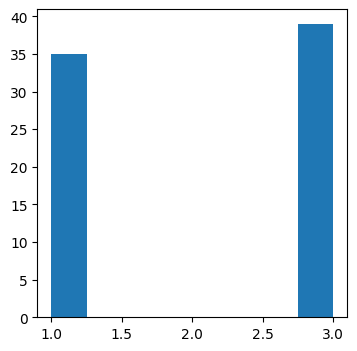

In [51]:
# it is the example below, use to see another community as well.
# Histogram of gender in community 2
plt.rcParams["figure.figsize"] = (4,4) # set the figure size
plt.hist(gender_2, bins = 8)

### Ideology political

In [52]:
politics = demos['POLITICAL']
politics = politics.dropna()
politics

PARTICIPANT_ID
00278    2
0068d    4
00f13    3
01cb6    1
02670    2
        ..
f92a4    3
f9fd8    2
fb2a2    3
fb9c4    2
ff2bf    4
Name: POLITICAL, Length: 300, dtype: int64

In [53]:
# Dataframe political ideology with each communities
politics_0 = politics.loc[list(communities[0])]
politics_1 = politics.loc[list(communities[1])]
politics_2 = politics.loc[list(communities[2])]

print("How many in politics belong to community 0:", len(politics_0))
print("How many in politics belong to community 1:", len(politics_1))
print("How many in politics belong to community 2:", len(politics_2))

How many in politics belong to community 0: 122
How many in politics belong to community 1: 94
How many in politics belong to community 2: 74


(array([17.,  0., 43.,  0., 46.,  0., 12.,  4.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 8 artists>)

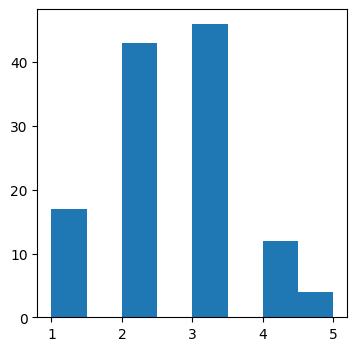

In [54]:
# it is the example below, use to see another community as well.
# Histogram of politics in community 0
plt.rcParams["figure.figsize"] = (4,4) # set the figure size
plt.hist(politics_0, bins = 8)

(array([ 9.,  0., 28.,  0., 40.,  0., 14.,  3.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 8 artists>)

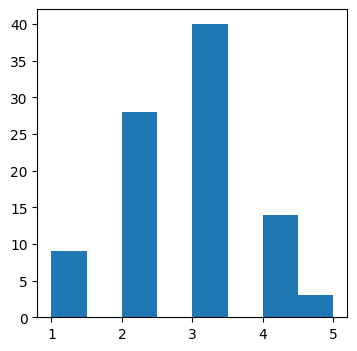

In [55]:
# it is the example below, use to see another community as well.
# Histogram of politics in community 1
plt.rcParams["figure.figsize"] = (4,4) # set the figure size
plt.hist(politics_1, bins = 8)

(array([ 5.,  0., 26.,  0., 31.,  0., 10.,  2.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 8 artists>)

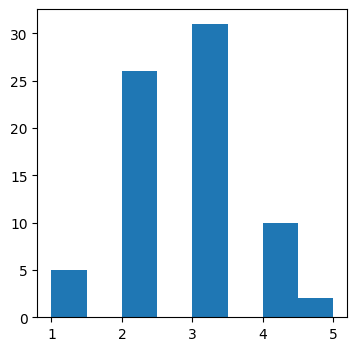

In [56]:
# it is the example below, use to see another community as well.
# Histogram of politics in community 2
plt.rcParams["figure.figsize"] = (4,4) # set the figure size
plt.hist(politics_2, bins = 8)

### Education 

In [57]:
demos.columns.tolist()

['AGE',
 'GENDER',
 'EDUCATION',
 'EMPLOYMENT',
 'INCOME',
 'POLITICAL',
 'DAT',
 'CRT2']

In [58]:
education = demos['EDUCATION']

In [59]:
education = education.dropna()
education

PARTICIPANT_ID
00278    5
0068d    2
00f13    4
01cb6    2
02670    5
        ..
f92a4    5
f9fd8    4
fb2a2    2
fb9c4    4
ff2bf    2
Name: EDUCATION, Length: 300, dtype: int64

In [60]:
# Dataframe political ideology with each communities
education_0 = education.loc[list(communities[0])]
education_1 = education.loc[list(communities[1])]
education_2 = education.loc[list(communities[2])]

print("How many in education belong to community 0:", len(education_0))
print("How many in education belong to community 1:", len(education_1))
print("How many in education belong to community 2:", len(education_2))


How many in education belong to community 0: 122
How many in education belong to community 1: 94
How many in education belong to community 2: 74


(array([26.,  0., 15.,  0., 52.,  0., 28.,  1.]),
 array([2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <BarContainer object of 8 artists>)

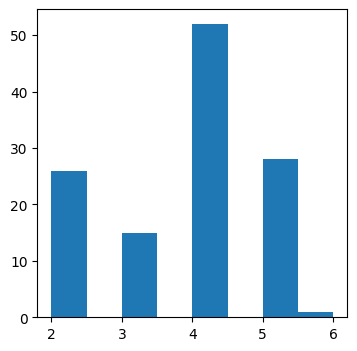

In [61]:
# it is the example below, use to see another community as well.
# Histogram of education in community 0
plt.rcParams["figure.figsize"] = (4,4) # set the figure size
plt.hist(education_0, bins = 8)

### Employment

In [62]:
demos['EMPLOYMENT']

PARTICIPANT_ID
00278    1
0068d    7
00f13    1
01cb6    8
02670    1
        ..
f92a4    1
f9fd8    8
fb2a2    8
fb9c4    8
ff2bf    7
Name: EMPLOYMENT, Length: 300, dtype: int64

In [63]:
employment = demos['EMPLOYMENT'].dropna()
employment

PARTICIPANT_ID
00278    1
0068d    7
00f13    1
01cb6    8
02670    1
        ..
f92a4    1
f9fd8    8
fb2a2    8
fb9c4    8
ff2bf    7
Name: EMPLOYMENT, Length: 300, dtype: int64

In [64]:
# Dataframe political ideology with each communities
employment_0 = employment.loc[list(communities[0])]
employment_1 = employment.loc[list(communities[1])]
employment_2 = employment.loc[list(communities[2])]

print("How many in employment belong to community 0:", len(employment_0))
print("How many in employment belong to community 1:", len(employment_1))
print("How many in employment belong to community 2:", len(employment_2))


How many in employment belong to community 0: 122
How many in employment belong to community 1: 94
How many in employment belong to community 2: 74


(array([49., 20.,  8.,  0., 12.,  5.,  0.,  4., 17.,  7.]),
 array([1. , 1.7, 2.4, 3.1, 3.8, 4.5, 5.2, 5.9, 6.6, 7.3, 8. ]),
 <BarContainer object of 10 artists>)

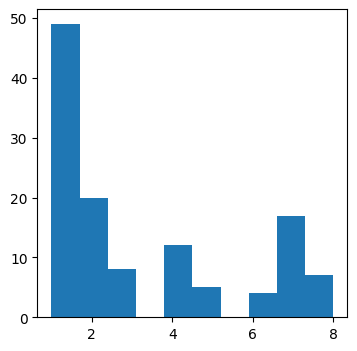

In [65]:
# it is the example below, use to see another community as well.
# Histogram of employment in community 0
plt.rcParams["figure.figsize"] = (4,4) # set the figure size
plt.hist(employment_0, bins = 10)

### Income

In [66]:
income = demos['INCOME'].dropna()

In [67]:
# Dataframe political ideology with each communities
income_0 = income.loc[list(communities[0])]
income_1 = income.loc[list(communities[1])]
income_2 = income.loc[list(communities[2])]

print("How many in income belong to community 0:", len(income_0))
print("How many in income belong to community 1:", len(income_1))
print("How many in income belong to community 2:", len(income_2))


How many in income belong to community 0: 122
How many in income belong to community 1: 94
How many in income belong to community 2: 74


(array([28.,  0., 45.,  0., 21.,  0., 22.,  6.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 8 artists>)

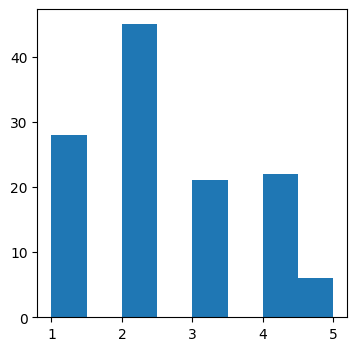

In [68]:
# it is the example below, use to see another community as well.
# Histogram of income in community 0
plt.rcParams["figure.figsize"] = (4,4) # set the figure size
plt.hist(income_0, bins = 8)

### DAT - how divergent the participant can think

In [69]:
dat = demos['DAT'].dropna()

In [70]:
# Dataframe political ideology with each communities
dat_0 = dat.loc[list(communities[0])]
dat_1 = dat.loc[list(communities[1])]
dat_2 = dat.loc[list(communities[2])]

print("How many in DAT belong to community 0:", len(dat_0))
print("How many in DAT belong to community 1:", len(dat_1))
print("How many in DAT belong to community 2:", len(dat_2))


How many in DAT belong to community 0: 122
How many in DAT belong to community 1: 94
How many in DAT belong to community 2: 74


(array([ 3.,  2.,  7., 22., 29., 34., 19.,  6.]),
 array([59.29313146, 63.5568003 , 67.82046915, 72.08413799, 76.34780684,
        80.61147568, 84.87514453, 89.13881337, 93.40248222]),
 <BarContainer object of 8 artists>)

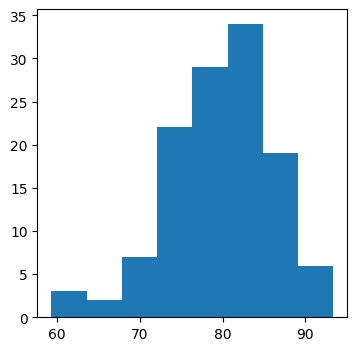

In [71]:
# it is the example below, use to see another community as well.
# Histogram of DAT in community 0
plt.rcParams["figure.figsize"] = (4,4) # set the figure size
plt.hist(dat_0, bins = 8)

### CRT - how creative the participant can think

In [72]:
crt = demos['CRT2'].dropna()

In [73]:
# Dataframe political ideology with each communities
crt_0 = crt.loc[list(communities[0])]
crt_1 = crt.loc[list(communities[1])]
crt_2 = crt.loc[list(communities[2])]

print("How many in CRT belong to community 0:", len(crt_0))
print("How many in CRT belong to community 1:", len(crt_1))
print("How many in CRT belong to community 2:", len(crt_2))


How many in CRT belong to community 0: 122
How many in CRT belong to community 1: 94
How many in CRT belong to community 2: 74


(array([ 3.,  0., 10.,  0., 22.,  0., 59., 28.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. ]),
 <BarContainer object of 8 artists>)

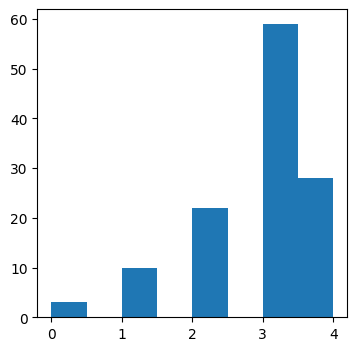

In [74]:
# it is the example below, use to see another community as well.
# Histogram of CRT in community 0
plt.rcParams["figure.figsize"] = (4,4) # set the figure size
plt.hist(crt_0, bins = 8)

## Visualize multiple graph

In [75]:
# Display graphs grouped by the community label
import matplotlib.pyplot as plt

# List of data for each plot
data_0 = [age_0, gender_0, education_0, employment_0, income_0, politics_0, dat_0, crt_0]
data_1 = [age_1, gender_1, education_1, employment_1, income_1, politics_1, dat_1, crt_1]
data_2 = [age_2, gender_2, education_2, employment_2, income_2, politics_2, dat_2, crt_2]

### Community 0



*The number of the community members: 122


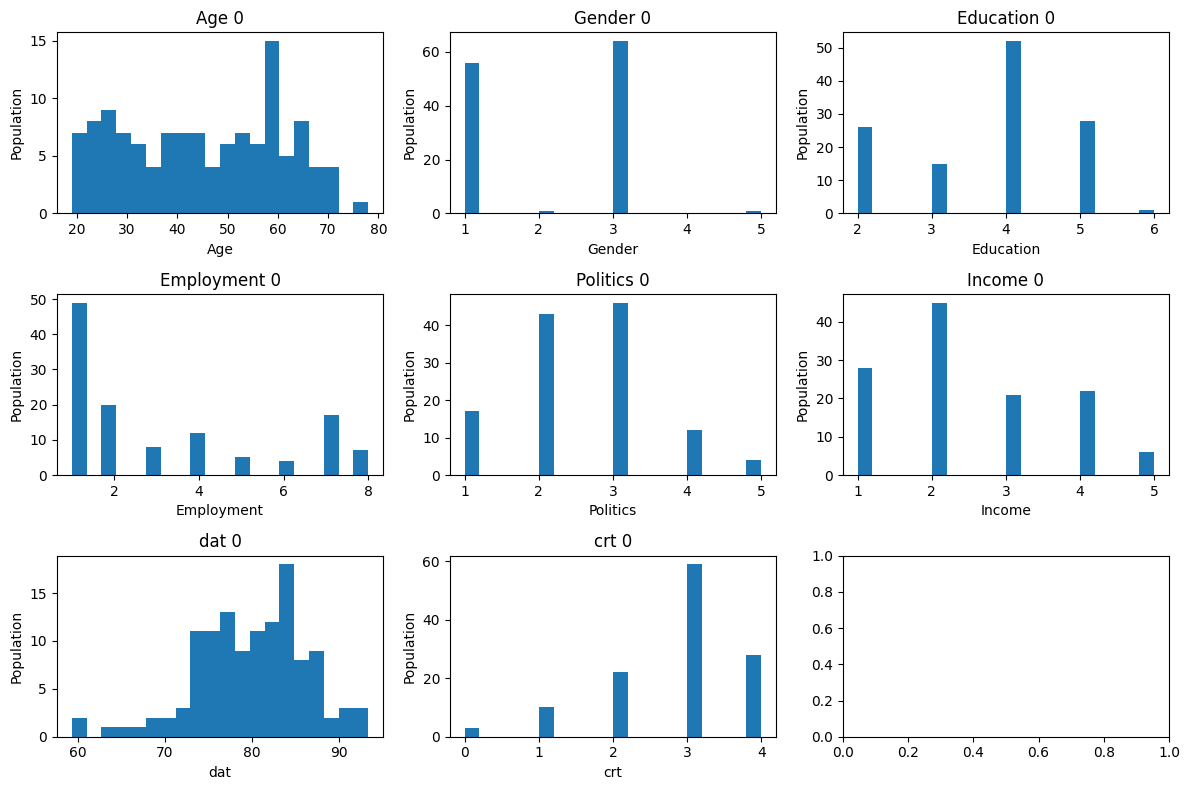

In [76]:
# Create subplots dynamically
fig, axes = plt.subplots(3, 3,  figsize=(12, 8))


# Create a histogram on one of the subplots
axes[0, 0].hist(age_0, bins=20)
axes[0, 0].set_title('Age 0')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Population')

# Create a histogram on one of the subplots
axes[0, 1].hist(gender_0, bins=20)
axes[0, 1].set_title('Gender 0')
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('Population')

# Create a histogram on one of the subplots
axes[0, 2].hist(education_0, bins=20)
axes[0, 2].set_title('Education 0')
axes[0, 2].set_xlabel('Education')
axes[0, 2].set_ylabel('Population')

# Create a histogram on one of the subplots
axes[1, 0].hist(employment_0, bins=20)
axes[1, 0].set_title('Employment 0')
axes[1, 0].set_xlabel('Employment')
axes[1, 0].set_ylabel('Population')

# Create a histogram on one of the subplots
axes[1, 1].hist(politics_0, bins=20)
axes[1, 1].set_title('Politics 0')
axes[1, 1].set_xlabel('Politics')
axes[1, 1].set_ylabel('Population')

# Create a histogram on one of the subplots
axes[1, 2].hist(income_0, bins=20)
axes[1, 2].set_title('Income 0')
axes[1, 2].set_xlabel('Income')
axes[1, 2].set_ylabel('Population')


# Create a histogram on one of the subplots
axes[2, 0].hist(dat_0, bins=20)
axes[2, 0].set_title('dat 0')
axes[2, 0].set_xlabel('dat')
axes[2, 0].set_ylabel('Population')


# Create a histogram on one of the subplots
axes[2, 1].hist(crt_0, bins=20)
axes[2, 1].set_title('crt 0')
axes[2, 1].set_xlabel('crt')
axes[2, 1].set_ylabel('Population')

# Adjust layout
plt.tight_layout()

# Print the number of the community members:
print("\n\n*The number of the community members:", len(communities[0]))

# Show the combined plots
plt.show()


### community 1



*The number of the community members: 94


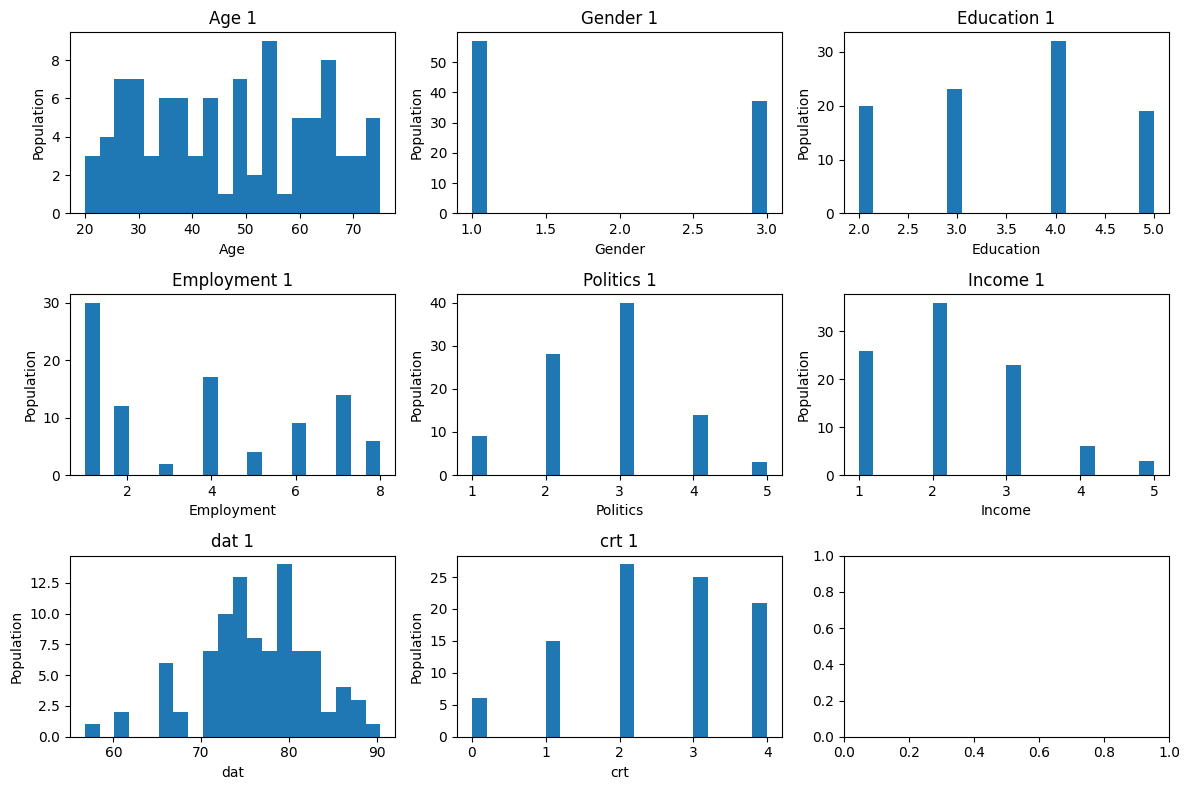

In [77]:
# Create subplots dynamically
fig, axes = plt.subplots(3, 3,  figsize=(12, 8))


# Create a histogram on one of the subplots
axes[0, 0].hist(age_1, bins=20)
axes[0, 0].set_title('Age 1')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Population')

# Create a histogram on one of the subplots
axes[0, 1].hist(gender_1, bins=20)
axes[0, 1].set_title('Gender 1')
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('Population')

# Create a histogram on one of the subplots
axes[0, 2].hist(education_1, bins=20)
axes[0, 2].set_title('Education 1')
axes[0, 2].set_xlabel('Education')
axes[0, 2].set_ylabel('Population')

# Create a histogram on one of the subplots
axes[1, 0].hist(employment_1, bins=20)
axes[1, 0].set_title('Employment 1')
axes[1, 0].set_xlabel('Employment')
axes[1, 0].set_ylabel('Population')

# Create a histogram on one of the subplots
axes[1, 1].hist(politics_1, bins=20)
axes[1, 1].set_title('Politics 1')
axes[1, 1].set_xlabel('Politics')
axes[1, 1].set_ylabel('Population')

# Create a histogram on one of the subplots
axes[1, 2].hist(income_1, bins=20)
axes[1, 2].set_title('Income 1')
axes[1, 2].set_xlabel('Income')
axes[1, 2].set_ylabel('Population')

# Create a histogram on one of the subplots
axes[2, 0].hist(dat_1, bins=20)
axes[2, 0].set_title('dat 1')
axes[2, 0].set_xlabel('dat')
axes[2, 0].set_ylabel('Population')


# Create a histogram on one of the subplots
axes[2, 1].hist(crt_1, bins=20)
axes[2, 1].set_title('crt 1')
axes[2, 1].set_xlabel('crt')
axes[2, 1].set_ylabel('Population')

# Adjust layout
plt.tight_layout()

# Print the number of the community members:
print("\n\n*The number of the community members:", len(communities[1]))

# Show the combined plots
plt.show()


* dat1: compared to the community 0, it is more evenly distributed. 

### community 2



*The number of the community members: 74


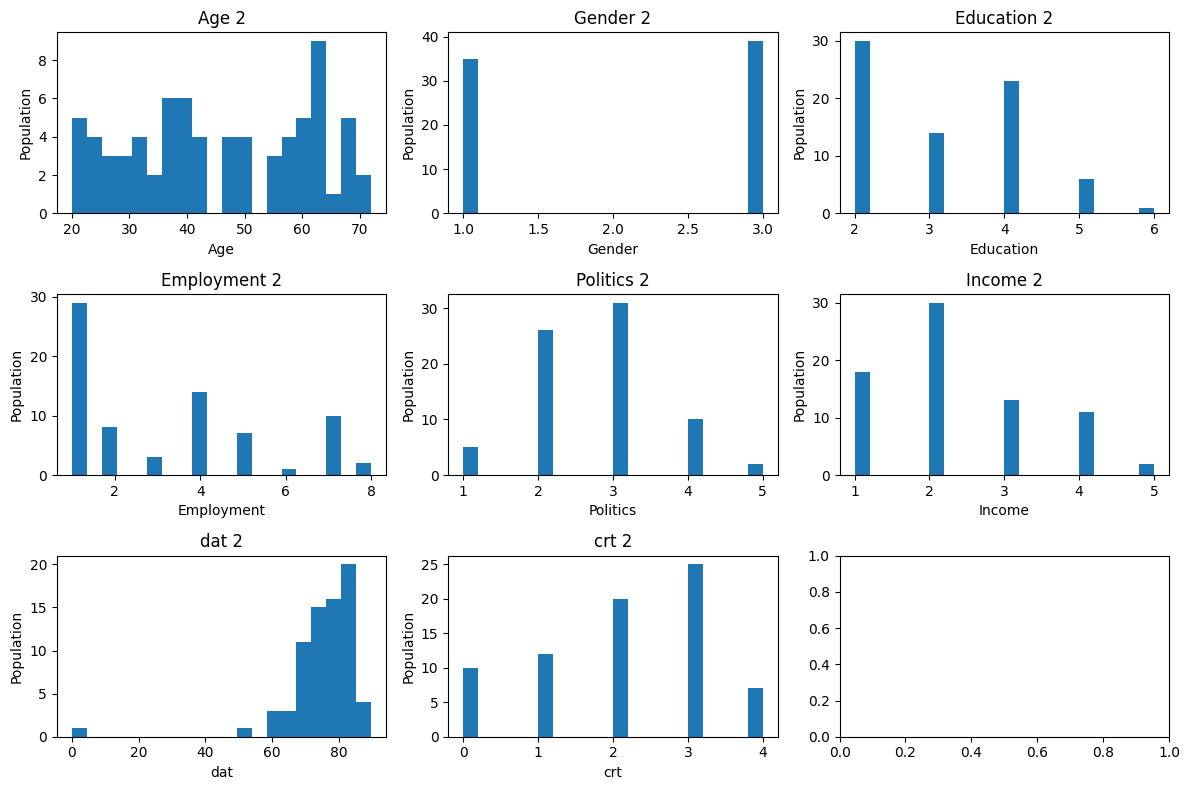

In [78]:
# Create subplots dynamically
fig, axes = plt.subplots(3, 3,  figsize=(12, 8))


# Create a histogram on one of the subplots
axes[0, 0].hist(age_2, bins=20)
axes[0, 0].set_title('Age 2')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Population')

# Create a histogram on one of the subplots
axes[0, 1].hist(gender_2, bins=20)
axes[0, 1].set_title('Gender 2')
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('Population')

# Create a histogram on one of the subplots
axes[0, 2].hist(education_2, bins=20)
axes[0, 2].set_title('Education 2')
axes[0, 2].set_xlabel('Education')
axes[0, 2].set_ylabel('Population')

# Create a histogram on one of the subplots
axes[1, 0].hist(employment_2, bins=20)
axes[1, 0].set_title('Employment 2')
axes[1, 0].set_xlabel('Employment')
axes[1, 0].set_ylabel('Population')

# Create a histogram on one of the subplots
axes[1, 1].hist(politics_2, bins=20)
axes[1, 1].set_title('Politics 2')
axes[1, 1].set_xlabel('Politics')
axes[1, 1].set_ylabel('Population')

# Create a histogram on one of the subplots
axes[1, 2].hist(income_2, bins=20)
axes[1, 2].set_title('Income 2')
axes[1, 2].set_xlabel('Income')
axes[1, 2].set_ylabel('Population')

# Create a histogram on one of the subplots
axes[2, 0].hist(dat_2, bins=20)
axes[2, 0].set_title('dat 2')
axes[2, 0].set_xlabel('dat')
axes[2, 0].set_ylabel('Population')


# Create a histogram on one of the subplots
axes[2, 1].hist(crt_2, bins=20)
axes[2, 1].set_title('crt 2')
axes[2, 1].set_xlabel('crt')
axes[2, 1].set_ylabel('Population')

# Adjust layout
plt.tight_layout()

# Print the number of the community members:
print("\n\n*The number of the community members:", len(communities[2]))

# Show the combined plots
plt.show()


* **REFsource** : interpreting the clustering results.

https://developers.google.com/machine-learning/clustering/interpret


### ANOVA for the continuous variable
Assumptions: ANOVA assumes homogeneity of variances (similar variances in groups), normal distribution of residuals, and independence of observations.

check if the data are approximately normally distributed within each cluster and if the variances across clusters are roughly equal.

**age**

In [79]:
# print cardinality, mean, var, std within the cluster.
# community_0
print("*community_0 in age")
print("how many:", len(age_0))
print("mean:", np.mean(age_0))
print("variance:", np.var(age_0))
print("std:", np.std(age_0))

# community_1
print("\n*community_1 in age ")
print("how many:", len(age_1))
print("mean:", np.mean(age_1))
print("variance:", np.var(age_1))
print("std:", np.std(age_1))

# community_2
print("\n*community_2 in age ")
print("how many:", len(age_2))
print("mean:", np.mean(age_2))
print("variance:", np.var(age_2))
print("std:", np.std(age_2))

*community_0 in age
how many: 122
mean: 45.10655737704918
variance: 242.39028486965873
std: 15.568888363324426

*community_1 in age 
how many: 94
mean: 46.851063829787236
variance: 248.08420099592576
std: 15.750688905439208

*community_2 in age 
how many: 74
mean: 46.0
variance: 232.3783783783784
std: 15.24396203020653


* ANOVA requires homogeneous variance -> Levene's test for the verification.

**DAT**

In [80]:
# print cardinality, mean, var, std within the cluster.
# community_0
print("*community_0 in dat")
print("how many:", len(dat_0))
print("mean:", np.mean(dat_0))
print("variance:", np.var(dat_0))
print("std:", np.std(dat_0))

# community_1
print("\n*community_1 in dat ")
print("how many:", len(dat_1))
print("mean:", np.mean(dat_1))
print("variance:", np.var(dat_1))
print("std:", np.std(dat_1))

# community_2
print("\n*community_2 in dat ")
print("how many:", len(dat_2))
print("mean:", np.mean(dat_2))
print("variance:", np.var(dat_2))
print("std:", np.std(dat_2))

*community_0 in dat
how many: 122
mean: 79.85649143895492
variance: 40.88021282160944
std: 6.393763588185712

*community_1 in dat 
how many: 94
mean: 76.44447419440819
variance: 39.66329268588116
std: 6.297880015202033

*community_2 in dat 
how many: 74
mean: 75.25806443593758
variance: 131.52761437960822
std: 11.46854892214391


**CRT**

In [81]:
# print cardinality, mean, var, std within the cluster.
# community_0
print("*community_0 in crt")
print("how many:", len(crt_0))
print("mean:", np.mean(crt_0))
print("variance:", np.var(crt_0))
print("std:", np.std(crt_0))

# community_1
print("\n*community_1 in crt ")
print("how many:", len(crt_1))
print("mean:", np.mean(crt_1))
print("variance:", np.var(crt_1))
print("std:", np.std(crt_1))

# community_2
print("\n*community_2 in crt ")
print("how many:", len(crt_2))
print("mean:", np.mean(crt_2))
print("variance:", np.var(crt_2))
print("std:", np.std(crt_2))

*community_0 in crt
how many: 122
mean: 2.8114754098360657
variance: 0.9234748723461436
std: 0.9609759998804047

*community_1 in crt 
how many: 94
mean: 2.425531914893617
variance: 1.3933906745133544
std: 1.180419702696187

*community_2 in crt 
how many: 74
mean: 2.0945945945945947
variance: 1.4099707815924032
std: 1.1874219054710096


### Levene's test

In [82]:
import scipy.stats as stats

In [83]:
# Age

# Assuming you have your data in separate groups
age_0
age_1
age_2

# Perform Levene's test
statistic, p_value = stats.levene(age_0, age_1, age_2)

# Print the results
print("Levene's Test Statistic:", statistic)
print("P-value:", p_value)

# Check the p-value against the significance level (commonly 0.05)
if p_value < 0.05:
    print("Reject the null hypothesis. There is evidence of unequal variances.")
else:
    print("Fail to reject the null hypothesis. Variances are likely homogeneous.")


Levene's Test Statistic: 0.03326364666155233
P-value: 0.9672872334975503
Fail to reject the null hypothesis. Variances are likely homogeneous.


In [84]:
# dat

# Assuming you have your data in separate groups
dat_0
dat_1
dat_2

# Perform Levene's test
statistic, p_value = stats.levene(dat_0, dat_1, dat_2)

# Print the results
print("Levene's Test Statistic:", statistic)
print("P-value:", p_value)

# Check the p-value against the significance level (commonly 0.05)
if p_value < 0.05:
    print("Reject the null hypothesis. There is evidence of unequal variances.")
else:
    print("Fail to reject the null hypothesis. Variances are likely homogeneous.")


Levene's Test Statistic: 2.523364204196442
P-value: 0.08196729449224077
Fail to reject the null hypothesis. Variances are likely homogeneous.


In [85]:
# crt

# Assuming you have your data in separate groups
crt_0
crt_1
crt_2

# Perform Levene's test
statistic, p_value = stats.levene(crt_0, crt_1, crt_2)

# Print the results
print("Levene's Test Statistic:", statistic)
print("P-value:", p_value)

# Check the p-value against the significance level (commonly 0.05)
if p_value < 0.05:
    print("Reject the null hypothesis. There is evidence of unequal variances.")
else:
    print("Fail to reject the null hypothesis. Variances are likely homogeneous.")


Levene's Test Statistic: 7.307469335785538
P-value: 0.0008027281821850997
Reject the null hypothesis. There is evidence of unequal variances.


### ANOVA

In [86]:
from scipy.stats import f_oneway

# Confidence level has been set initially 0.95, therefore p < 0.05 is able to reject the null hypothesis. 
# null-hypothesis: the groups do not have significantly different means

In [111]:
# Age
# Group the data by cluster label and extract the continuous feature
grouped_data = [age_0, age_1, age_2]

# Perform ANOVA
f_statistic, p_value = f_oneway(*grouped_data)

# Print the p-value
print("ANOVA test p-value:", p_value) # fail to reject the hypothesis

ANOVA test p-value: 0.7171519192449428


In [110]:
# dat
# Group the data by cluster label and extract the continuous feature
grouped_data = [dat_0, dat_1, dat_2]

# Perform ANOVA
f_statistic, p_value = f_oneway(*grouped_data)

# Print the p-value
print("ANOVA test p-value:", p_value)

ANOVA test p-value: 0.00016741582390079632


* p is below 0.05 -> reject the null-hypothesis

**Result:**
There's a **significant difference** in the means of the continuous feature across different clusters

### Welch's ANOVA for CRT

**NOT suitable for the ANOVA, because the variances are not homogeneous", -> Welch's ANOVA**

In [113]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [114]:
# crt
# Group the crta by cluster label and extract the continuous feature
grouped_crta = [crt_0, crt_1]

# Perform Welch's ANOVA which doesn't require the homogeneous variances. 
t_stat, p_value = stats.ttest_ind(crt_0, crt_1, equal_var=False)
# Print the result
print(p_value)


0.011104742654799098


* p is below 0.05 -> reject the null-hypothesis

**Result:**
There's a **significant difference** in the means of the continuous feature across different clusters

### Chi-square test for categorical variable
- one variable: feature, the other one: label

In [115]:
# Create a dataframe with participants id and their community label
label_0 = pd.DataFrame(data= [0 for i in range(len(communities[0]))], index = list(communities[0]))
label_1 = pd.DataFrame(data= [1 for i in range(len(communities[1]))], index = list(communities[1]))
label_2 = pd.DataFrame(data= [2 for i in range(len(communities[2]))], index = list(communities[2]))

In [116]:
print(len(label_0), len(label_1), len(label_2))

122 94 74


In [117]:
label_0 = label_0.reset_index()
label_1 = label_1.reset_index()
label_2 = label_2.reset_index()

In [118]:
print(len(label_0), len(label_1), len(label_2))

122 94 74


In [119]:
# check if the above cell is coherent with the result of this cell.
print(len(communities[0]), len(communities[1]), len(communities[2]))

122 94 74


In [120]:
labels = pd.concat([label_0, label_1, label_2], axis = 0, ignore_index = True)
labels = labels.rename(columns = { 0 : 'label'})

**calculate expected frequencies**

In [121]:
# Sort the column 'index' into alphabetical order
labels = labels.sort_values(by='index')
labels = labels.reset_index()
labels = labels[['index', 'label']]

In [122]:
# Sort the dataframe into alphabetical order
gender = gender.reset_index()
gender = gender.sort_values(by = 'PARTICIPANT_ID')

politics = politics.reset_index()
politics = politics.sort_values(by = 'PARTICIPANT_ID')

education = education.reset_index()
education = education.sort_values(by = 'PARTICIPANT_ID')

employment = employment.reset_index()
employment = employment.sort_values(by = 'PARTICIPANT_ID')

income = income.reset_index()
income = income.sort_values(by = 'PARTICIPANT_ID')

In [123]:
# Only selects the participants that also remains in the labels' participant_id info.
gender = gender[gender['PARTICIPANT_ID'].isin(labels['index'])].reset_index()
gender = gender[['PARTICIPANT_ID', 'GENDER']]

politics = politics[politics['PARTICIPANT_ID'].isin(labels['index'])].reset_index()
politics = politics[['PARTICIPANT_ID', 'POLITICAL']]

education = education[education['PARTICIPANT_ID'].isin(labels['index'])].reset_index()
education = education[['PARTICIPANT_ID', 'EDUCATION']]

employment = employment[employment['PARTICIPANT_ID'].isin(labels['index'])].reset_index()
employment = employment[['PARTICIPANT_ID', 'EMPLOYMENT']]

income = income[income['PARTICIPANT_ID'].isin(labels['index'])].reset_index()
income = income[['PARTICIPANT_ID', 'INCOME']]

In [124]:
# check if the order of the particpant column is identical to the label column - gender
cnt = 0
for i in range(len(labels)): 
    if gender['PARTICIPANT_ID'].loc[i] == labels['index'].loc[i]: 
        pass
    else:
        cnt += 1
print("gender - not identical:", cnt)

gender - not identical: 0


In [125]:
# check if the order of the particpant column is identical to the label column - politics
cnt = 0
for i in range(len(labels)): 
    if politics['PARTICIPANT_ID'].loc[i] == labels['index'].loc[i]: 
        pass
    else:
        cnt += 1
print("politics - not identical:", cnt)

politics - not identical: 0


In [126]:
# check if the order of the particpant column is identical to the label column - education
cnt = 0
for i in range(len(labels)): 
    if education['PARTICIPANT_ID'].loc[i] == labels['index'].loc[i]: 
        pass
    else:
        cnt += 1
print("education - not identical:", cnt)

education - not identical: 0


In [127]:
# check if the order of the particpant column is identical to the label column - employment
cnt = 0
for i in range(len(labels)): 
    if employment['PARTICIPANT_ID'].loc[i] == labels['index'].loc[i]: 
        pass
    else:
        cnt += 1
print("employment - not identical:", cnt)

employment - not identical: 0


In [128]:
# check if the order of the particpant column is identical to the label column - income
cnt = 0
for i in range(len(labels)): 
    if income['PARTICIPANT_ID'].loc[i] == labels['index'].loc[i]: 
        pass
    else:
        cnt += 1
print("income - not identical:", cnt)

income - not identical: 0


### Chi-square

In [129]:
from scipy.stats import chi2_contingency

In [130]:
# Create a contingency table
contingency_table = pd.crosstab(gender['GENDER'], labels['label'])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the p-value
print("gender, Chi-squared test p-value:", p)


gender, Chi-squared test p-value: 0.2709119057785105


p is not below 0.05 -> fail to reject the null-hypothesis

**Result:**
The distribution of the feature(gender) is **not** significantly different across different clusters.

In [131]:
# Create a contingency table
contingency_table = pd.crosstab(politics['POLITICAL'], labels['label'])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the p-value
print("politics, Chi-squared test p-value:", p)

politics, Chi-squared test p-value: 0.8043113293671343


p is not below 0.05 -> fail to reject the null-hypothesis

**Result:**
The distribution of the feature(politics) is **not** significantly different across different clusters.

In [133]:
# Create a contingency table
contingency_table = pd.crosstab(education['EDUCATION'], labels['label'])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the p-value
print("education, Chi-squared test p-value:", p)

education, Chi-squared test p-value: 0.006668102988161206


p is below 0.05 -> reject the null-hypothesis

**Result:**
The distribution of the feature(education) **is significantly different** across different clusters.

In [134]:
# Create a contingency table
contingency_table = pd.crosstab(employment['EMPLOYMENT'], labels['label'])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the p-value
print("employment, Chi-squared test p-value:", p)

employment, Chi-squared test p-value: 0.1624941620887399


p is not below 0.05 -> fail to reject the null-hypothesis

**Result:**
The distribution of the feature(employment) is **not** significantly different across different clusters..

In [135]:
# Create a contingency table
contingency_table = pd.crosstab(income['INCOME'], labels['label'])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the p-value
print("income, Chi-squared test p-value:", p)

income, Chi-squared test p-value: 0.38419870536806644


p is not below 0.05 -> fail to reject the null-hypothesis

**Result:**
The distribution of the feature(employment) is **not** significantly different across different clusters..

### Analysis of the ANOVA and Chi-Square test results

1. ANOVA

     1) Table of metrics - mean, var, std, cardinality, p-value:
        https://docs.google.com/spreadsheets/d/1E4k_kSAiAspQuXAbEuYquVKFuzHa5Ihz7mNryUj1jOU/edit#gid=446196028 -> update

     2) **DAT, CRT** shows the difference in means across the clusters

2. Chi-Square

: Except for the **EDUCATION**, There was no significant difference across the clusters with the distribution of the categorical features.